In [212]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-allergens-and-allergies/FoodData.csv
/kaggle/input/foodcom-recipes-and-reviews/recipes.parquet
/kaggle/input/foodcom-recipes-and-reviews/reviews.parquet
/kaggle/input/foodcom-recipes-and-reviews/reviews.csv
/kaggle/input/foodcom-recipes-and-reviews/recipes.csv
/kaggle/input/data-diet/Phase1_chatbot.py


In [213]:
# Loading the data
data = pd.read_csv("/kaggle/input/foodcom-recipes-and-reviews/recipes.csv")
data

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522512,541379,Meg's Fresh Ginger Gingerbread,2002090414,rdsxc,PT35M,PT1H,PT1H35M,2020-12-22T15:27:00Z,Make and share this Meg's Fresh Ginger Gingerb...,character(0),...,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8.0,1 8x8 cake pan,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,211566,Denver cooks,PT3H,PT30M,PT3H30M,2020-12-22T15:32:00Z,"White, black, green, and pink peppercorns add ...","""https://img.sndimg.com/food/image/upload/w_55...",...,71.4,433.8,766.3,3.2,0.7,0.1,117.0,8.0,1 Roast,"c(""Position rack in center of oven and preheat..."
522514,541381,Kirshwasser Ice Cream,2001131545,Jonathan F.,PT3H,PT1H,PT4H,2020-12-22T15:33:00Z,Make and share this Kirshwasser Ice Cream reci...,character(0),...,72.6,470.9,192.5,33.9,0.0,17.3,12.8,6.0,NaN,"c(""heat half and half and heavy cream to a sim..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...","""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,2.9,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls,"c(""In a small bowl, combine mayo and wasabi pa..."


# Column Selection

In [214]:
dataset=data.copy()
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
dataset=dataset[columns]

#Considring columns which are required for our model

# Data Cleaning :Handling Null Values and Duplicates

In [215]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               522517 non-null  int64  
 1   Name                   522517 non-null  object 
 2   CookTime               439972 non-null  object 
 3   PrepTime               522517 non-null  object 
 4   TotalTime              522517 non-null  object 
 5   RecipeIngredientParts  522517 non-null  object 
 6   Calories               522517 non-null  float64
 7   FatContent             522517 non-null  float64
 8   CholesterolContent     522517 non-null  float64
 9   SodiumContent          522517 non-null  float64
 10  CarbohydrateContent    522517 non-null  float64
 11  FiberContent           522517 non-null  float64
 12  SugarContent           522517 non-null  float64
 13  ProteinContent         522517 non-null  float64
 14  RecipeInstructions     522517 non-nu

removing Duplicates

In [216]:
dataset = dataset.drop_duplicates()

Removeing Drop Null values

In [217]:
dataset = dataset.dropna()

In [218]:
dataset

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522511,541378,Meg's Pumpkin Spice Bread,PT45M,PT30M,PT1H15M,"c(""eggs"", ""water"", ""pumpkin"", ""baking soda"", ""...",898.2,34.8,106.3,903.3,139.0,2.6,86.8,10.8,"c(""Beat eggs, add oil, water, and pumpkin; mix..."
522512,541379,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,"c(""fresh ginger"", ""unsalted butter"", ""dark bro...",316.6,12.5,54.4,278.2,48.5,0.8,22.8,3.9,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,PT3H,PT30M,PT3H30M,"c(""Dijon mustard"", ""garlic"", ""peppercorns"", ""s...",2063.4,172.4,433.8,766.3,3.2,0.7,0.1,117.0,"c(""Position rack in center of oven and preheat..."
522514,541381,Kirshwasser Ice Cream,PT3H,PT1H,PT4H,"c(""half-and-half"", ""heavy cream"", ""brandy"", ""s...",1271.3,117.2,470.9,192.5,33.9,0.0,17.3,12.8,"c(""heat half and half and heavy cream to a sim..."


After datacleaning we are left with 439972 unique recipes

# Feature Engineering 

#'Veg_Nonveg' Labeling\
we have created a nonveg list with almost all possible nonveg ingredients. \
By using this "nonveg" list we categorized the recipes whether tey belong to veg to nonveg

In [219]:
nonveg = ["beef", "pork", "lamb", "goat", "venison", "bison", "rabbit",
          "chicken", "turkey", "duck", "quail", "goose", "salmon","egg","eggs","half boiled eggs","half boiled egg",
          "tuna", "cod", "haddock", "trout", "shrimp", "crab", "lobster","egg yolk","egg white","hard-boiled eggs",
          "mussels", "clams", "oysters", "squid", "calamari", "octopus","meat", 
          "bacon", "sausages", "hot dogs", "ham", "pepperoni", "salami","chicken broth","chicken pieces","hard-boiled eggs","eggplants","fish sauce",
          "lard", "pork fa", "tallow", "mutton fat","ground beef","bacon","chicken breast","shrimp","chicken broth", "chicken stock", "beef broth", "beef stock", "fish stock",
          "chicken thigh", "chicken leg", "chicken breast", "chicken wings", "chicken drumstick", "chicken liver"]

# Function to label data as veg or nonveg
def label_dish(ingredient_str):
    # Remove "c(" at the beginning and ")" at the end of the string
    ingredient_str = ingredient_str.lstrip("c(").rstrip(")")
    
    # Split the string into a list of ingredients
    ingredients = [ingredient.strip().lower() for ingredient in ingredient_str.split(",")]
    
    for ingredient in ingredients:
        for nonveg_item in nonveg:
            if nonveg_item in ingredient:
                return "nonveg"
    return "vegetarian"

# Apply the function to label each row in the dataset
dataset["Veg_Nonveg"] = dataset["RecipeIngredientParts"].apply(label_dish)

# Using .loc to assign values without the warning
dataset.loc[dataset.index, "Veg_Nonveg"] = dataset["Veg_Nonveg"]


In [220]:
dataset

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan...",vegetarian
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and...",nonveg
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ...",vegetarian
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc...",nonveg
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil...",vegetarian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522511,541378,Meg's Pumpkin Spice Bread,PT45M,PT30M,PT1H15M,"c(""eggs"", ""water"", ""pumpkin"", ""baking soda"", ""...",898.2,34.8,106.3,903.3,139.0,2.6,86.8,10.8,"c(""Beat eggs, add oil, water, and pumpkin; mix...",nonveg
522512,541379,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,"c(""fresh ginger"", ""unsalted butter"", ""dark bro...",316.6,12.5,54.4,278.2,48.5,0.8,22.8,3.9,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak...",nonveg
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,PT3H,PT30M,PT3H30M,"c(""Dijon mustard"", ""garlic"", ""peppercorns"", ""s...",2063.4,172.4,433.8,766.3,3.2,0.7,0.1,117.0,"c(""Position rack in center of oven and preheat...",vegetarian
522514,541381,Kirshwasser Ice Cream,PT3H,PT1H,PT4H,"c(""half-and-half"", ""heavy cream"", ""brandy"", ""s...",1271.3,117.2,470.9,192.5,33.9,0.0,17.3,12.8,"c(""heat half and half and heavy cream to a sim...",vegetarian


The column "Veg_Nonveg" has been labeled to categorize whether the recipe belongs to veg or non-veg type of recipe 

In [221]:
# Count the number of veg and non_veg recipes
veg_count = dataset[dataset['Veg_Nonveg'] == 'vegetarian']['Veg_Nonveg'].count()
non_veg_count = dataset[dataset['Veg_Nonveg'] == 'nonveg']['Veg_Nonveg'].count()

# Print the counts
print("Number of vegetarian recipes:", veg_count)
print("Number of non-vegetarian recipes:", non_veg_count)

Number of vegetarian recipes: 192148
Number of non-vegetarian recipes: 247824


After categorizing the recipe into veg nonveg\
we observed that our data has 192148 veg recipes and 247824 nonveg recipes.

# Data Visualization

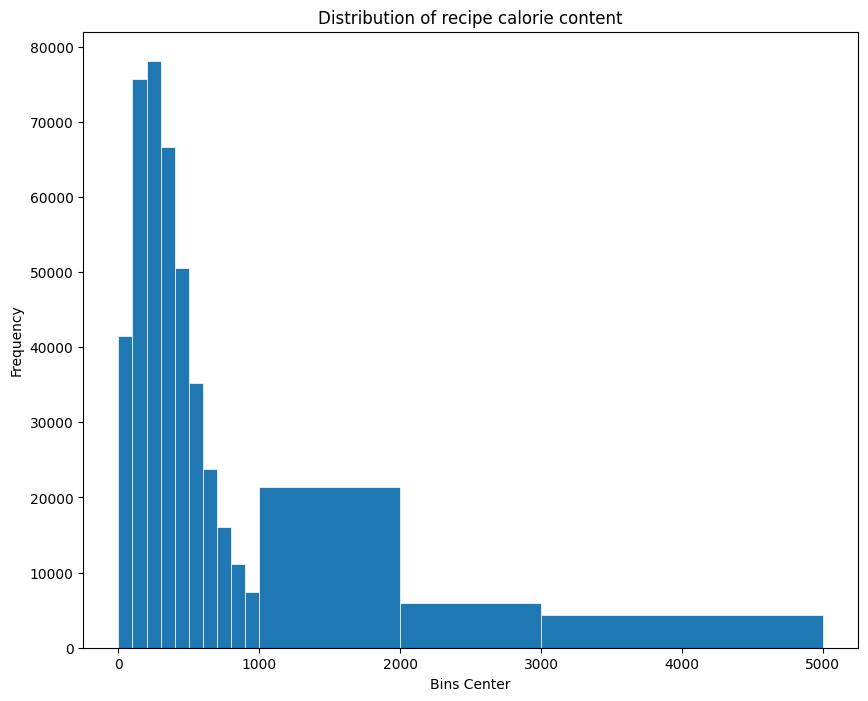

In [222]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of recipe calorie content')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

Most of the recipes fall in range of 200 caorie content

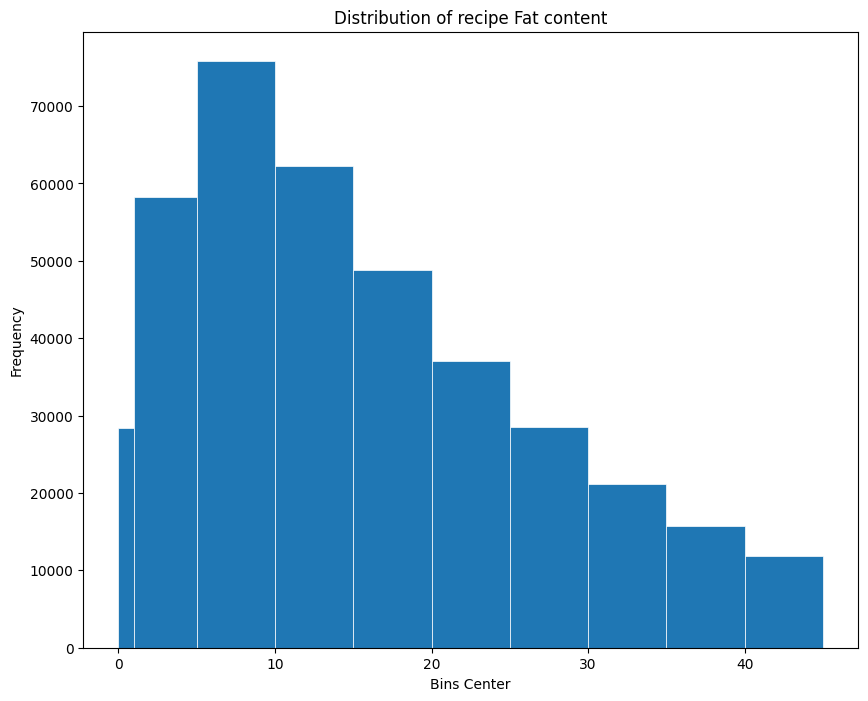

In [223]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of recipe Fat content')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.FatContent.to_numpy(),bins=[0,1,5,10,15,20,25,30,35,40,45],linewidth=0.5, edgecolor="white")
plt.show()

Most of the recipes fall in range of 5-10 Fat content

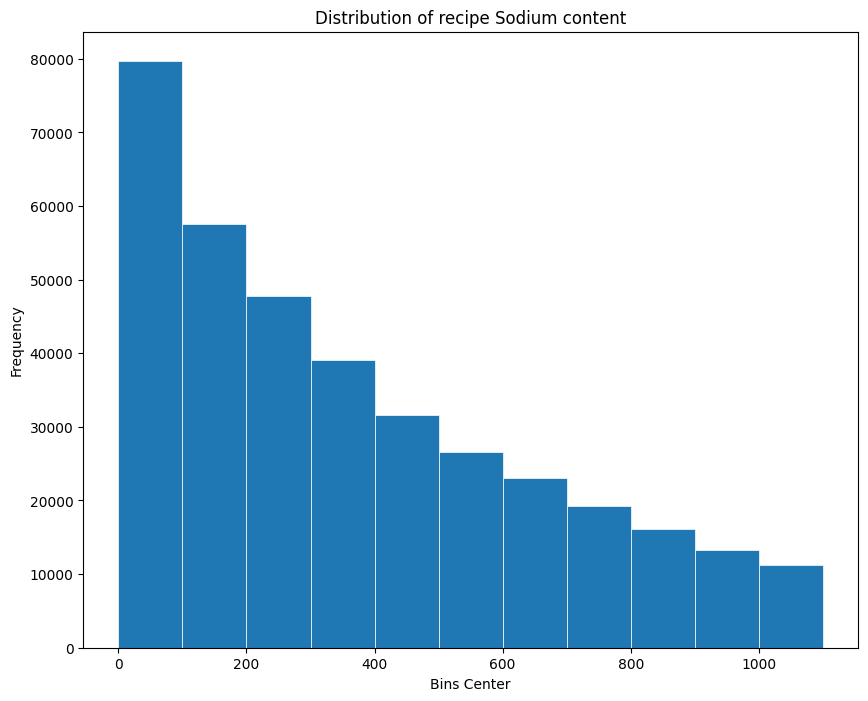

In [224]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of recipe Sodium content')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.SodiumContent.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1100],linewidth=0.5, edgecolor="white")
plt.show()

Most of the recipes fall in range of 0-100 Fat content

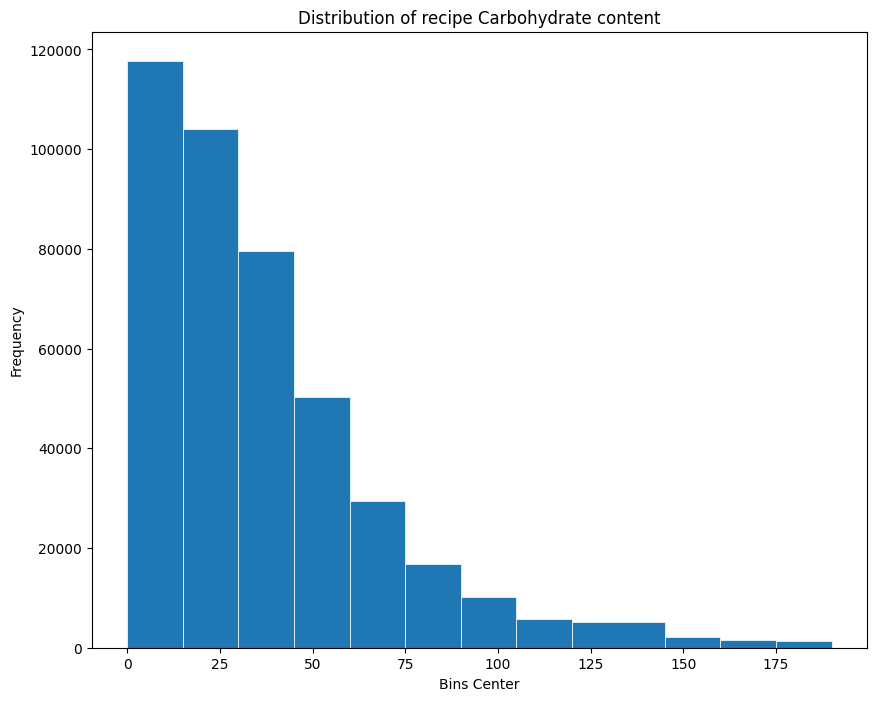

In [225]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of recipe Carbohydrate content')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.CarbohydrateContent.to_numpy(),bins=[0,15,30,45,60,75,90,105,120,145,160,175,190],linewidth=0.5, edgecolor="white")
plt.show()

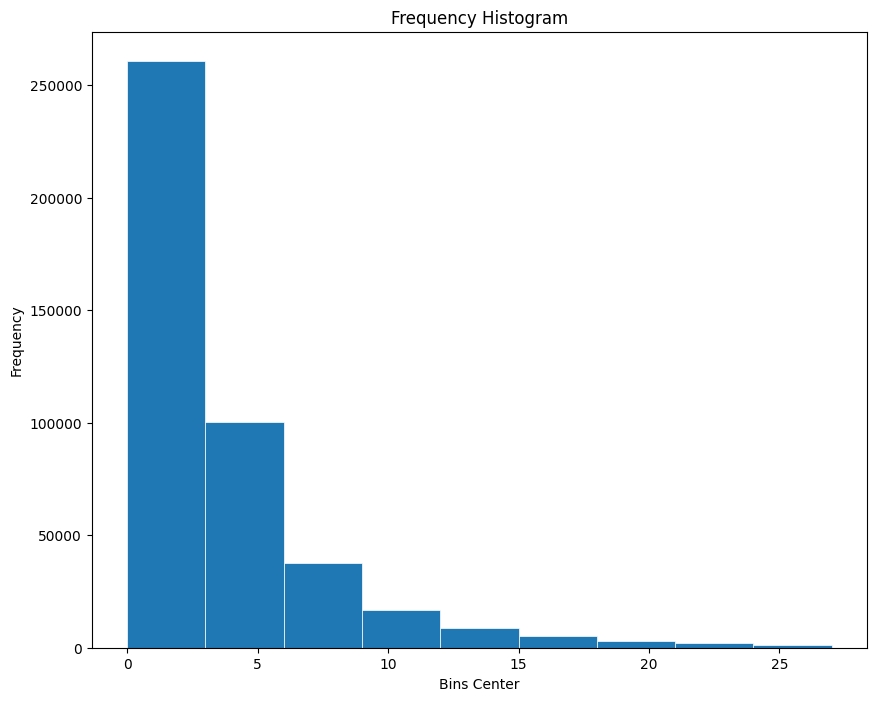

In [226]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.FiberContent.to_numpy(),bins=[0,3,6,9,12,15,18,21,24,27],linewidth=0.5, edgecolor="white")
plt.show()

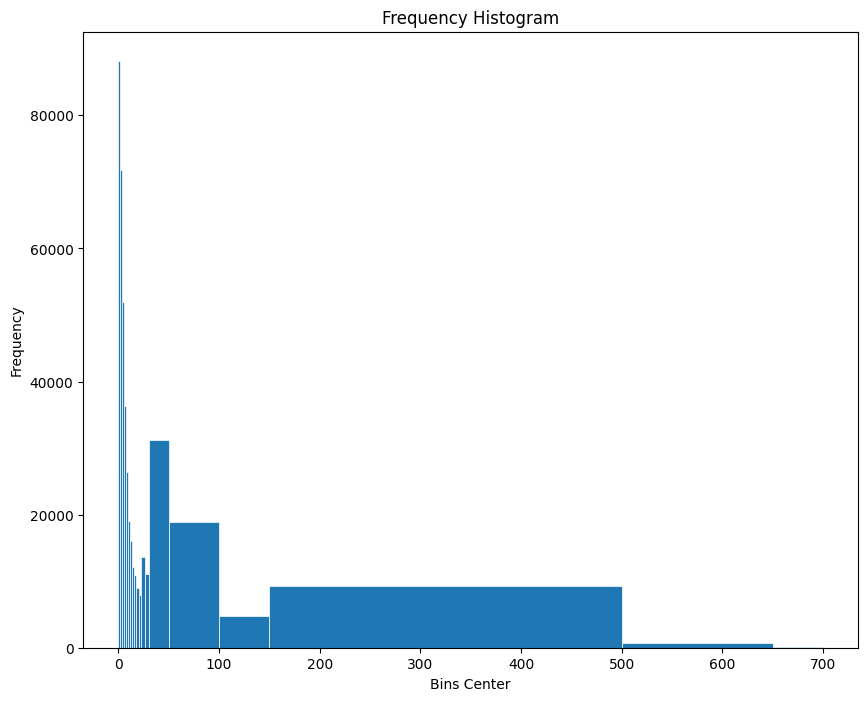

In [227]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.SugarContent.to_numpy(),bins=[0,2,4,6,8,10,12,14,16,18,20,22,26,30,50,100,150,500,650,700],linewidth=0.5, edgecolor="white")
plt.show()

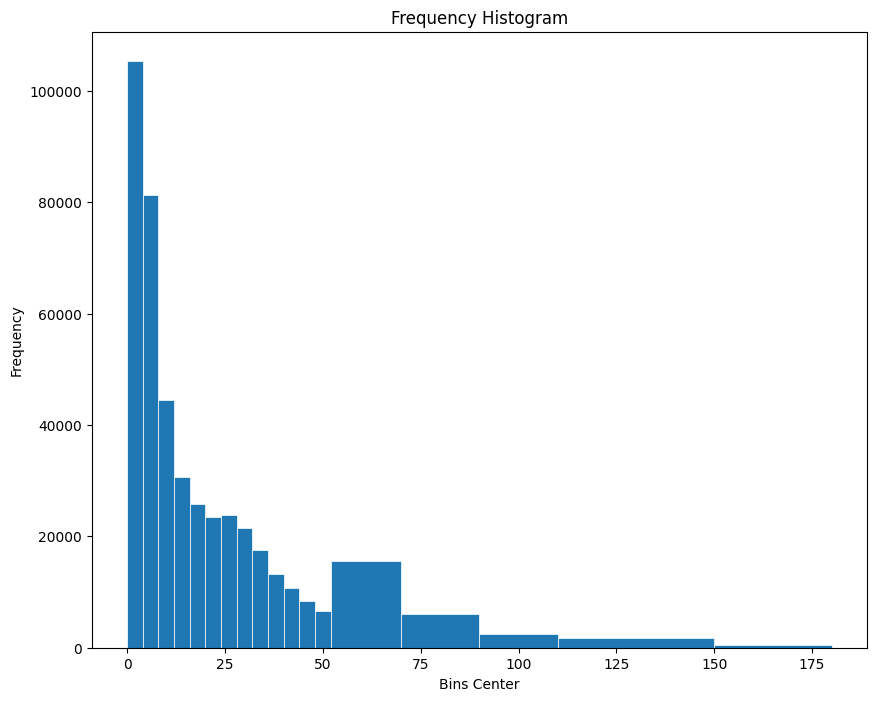

In [228]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.ProteinContent.to_numpy(),bins=[0,4,8,12,16,20,24,28,32,36,40,44,48,52,70,90,110,150,180],linewidth=0.5, edgecolor="white")
plt.show()

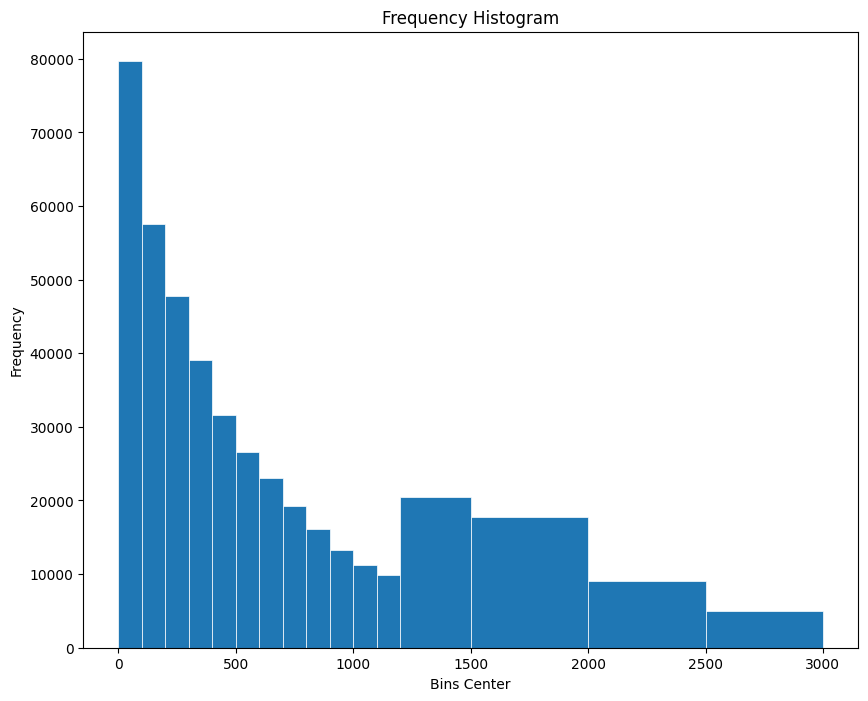

In [229]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.SodiumContent.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1500,2000,2500,3000],linewidth=0.5, edgecolor="white")
plt.show()

In [230]:
import pandas as pd

# Function to categorize nutritional values
# Function to categorize nutritional values and format labels
def categorize_nutrition(value, low_threshold, high_threshold):
    if value <= low_threshold:
        return 'low'
    elif value > high_threshold:
        return 'high'
    else:
        return 'normal'

# Define thresholds for each nutritional component
carb_low, carb_high = 50, 120
fiber_low, fiber_high = 5, 10
sugar_low, sugar_high = 10, 20
protein_low, protein_high = 7, 20
calories_low, calories_high = 300, 750
fat_low, fat_high = 10, 20
cholesterol_low, cholesterol_high = 30, 90
sodium_low, sodium_high = 140, 700

# Apply categorization function to respective columns and combine results into one column
dataset['Nutritional_Category'] = (
    dataset['FatContent'].apply(lambda x: categorize_nutrition(x, fat_low, fat_high)) +'_fat_content'+ ', ' +
    dataset['CarbohydrateContent'].apply(lambda x: categorize_nutrition(x, carb_low, carb_high)) +'_carbohydrate_content'+ ', ' +
    dataset['FiberContent'].apply(lambda x: categorize_nutrition(x, fiber_low, fiber_high)) +'_fiber_content'+ ', ' +
    dataset['SugarContent'].apply(lambda x: categorize_nutrition(x, sugar_low, sugar_high)) +'_sugar_content'+ ', ' +
    dataset['ProteinContent'].apply(lambda x: categorize_nutrition(x, protein_low, protein_high)) + '_protein_content'+', ' +
    dataset['Calories'].apply(lambda x: categorize_nutrition(x, calories_low, calories_high)) + '_calories_content'+', ' +
    dataset['CholesterolContent'].apply(lambda x: categorize_nutrition(x, cholesterol_low, cholesterol_high)) + '_cholesterol_content'+', ' +
    dataset['SodiumContent'].apply(lambda x: categorize_nutrition(x, sodium_low, sodium_high))+'_sodium_content'
)
dataset

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522511,541378,Meg's Pumpkin Spice Bread,PT45M,PT30M,PT1H15M,"c(""eggs"", ""water"", ""pumpkin"", ""baking soda"", ""...",898.2,34.8,106.3,903.3,139.0,2.6,86.8,10.8,"c(""Beat eggs, add oil, water, and pumpkin; mix...",nonveg,"high_fat_content, high_carbohydrate_content, l..."
522512,541379,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,"c(""fresh ginger"", ""unsalted butter"", ""dark bro...",316.6,12.5,54.4,278.2,48.5,0.8,22.8,3.9,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak...",nonveg,"normal_fat_content, low_carbohydrate_content, ..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,PT3H,PT30M,PT3H30M,"c(""Dijon mustard"", ""garlic"", ""peppercorns"", ""s...",2063.4,172.4,433.8,766.3,3.2,0.7,0.1,117.0,"c(""Position rack in center of oven and preheat...",vegetarian,"high_fat_content, low_carbohydrate_content, lo..."
522514,541381,Kirshwasser Ice Cream,PT3H,PT1H,PT4H,"c(""half-and-half"", ""heavy cream"", ""brandy"", ""s...",1271.3,117.2,470.9,192.5,33.9,0.0,17.3,12.8,"c(""heat half and half and heavy cream to a sim...",vegetarian,"high_fat_content, low_carbohydrate_content, lo..."


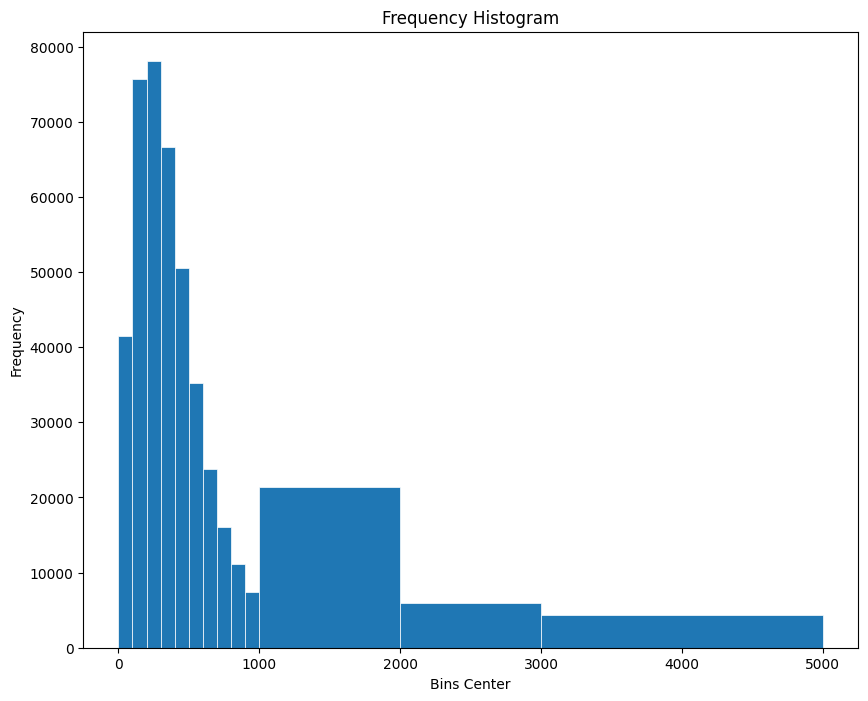

In [231]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

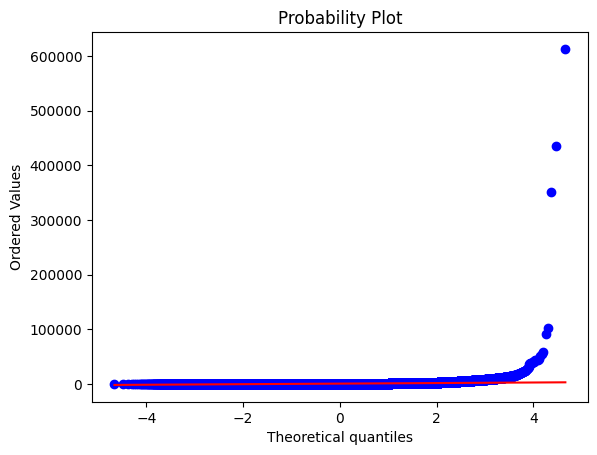

In [232]:
import pylab 
import scipy.stats as stats
stats.probplot(dataset.Calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

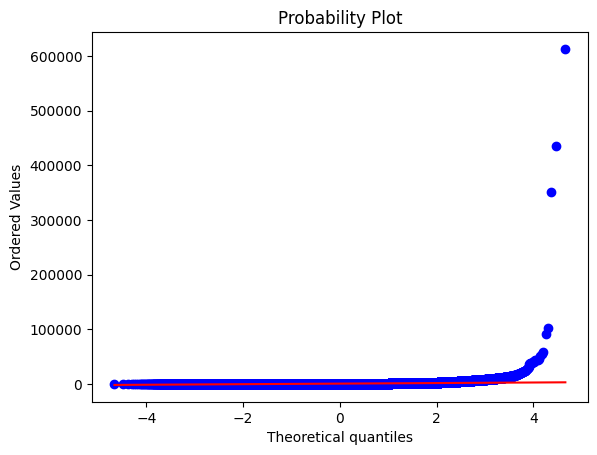

In [233]:
import pylab 
import scipy.stats as stats
stats.probplot(dataset.Calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

In [234]:
max_Calories=2000
max_daily_fat=100
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein]

In [235]:
extracted_data=dataset.copy()
for column,maximum in zip(extracted_data.columns[6:15],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [236]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366649 entries, 0 to 522512
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               366649 non-null  int64  
 1   Name                   366649 non-null  object 
 2   CookTime               366649 non-null  object 
 3   PrepTime               366649 non-null  object 
 4   TotalTime              366649 non-null  object 
 5   RecipeIngredientParts  366649 non-null  object 
 6   Calories               366649 non-null  float64
 7   FatContent             366649 non-null  float64
 8   CholesterolContent     366649 non-null  float64
 9   SodiumContent          366649 non-null  float64
 10  CarbohydrateContent    366649 non-null  float64
 11  FiberContent           366649 non-null  float64
 12  SugarContent           366649 non-null  float64
 13  ProteinContent         366649 non-null  float64
 14  RecipeInstructions     366649 non-null  o

In [237]:
extracted_data.iloc[:,6:14].corr()

,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.849414,0.609180,0.527982,0.623162,0.386966,0.128474,0.718579
FatContent,0.849414,1.000000,0.619308,0.420770,0.208800,0.139622,0.025853,0.546495
CholesterolContent,0.609180,0.619308,1.000000,0.369865,0.066508,-0.051156,-0.031393,0.689682
SodiumContent,0.527982,0.420770,0.369865,1.000000,0.283183,0.243006,-0.071870,0.520722
CarbohydrateContent,0.623162,0.208800,0.066508,0.283183,1.000000,0.580805,0.370831,0.214909
FiberContent,0.386966,0.139622,-0.051156,0.243006,0.580805,1.000000,0.069632,0.237235
SugarContent,0.128474,0.025853,-0.031393,-0.071870,0.370831,0.069632,1.000000,-0.145576
ProteinContent,0.718579,0.546495,0.689682,0.520722,0.214909,0.237235,-0.145576,1.000000


In [241]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,6:14].to_numpy())

In [242]:
prep_data

array([[-0.72880649, -0.9398855 , -0.84429124, ...,  0.11142646,
         2.34649378, -0.80936203],
       [ 0.88049627,  0.46453026, -0.9653023 , ...,  3.85503677,
         2.55404089,  0.87486946],
       [-1.02537296, -1.07706099, -0.9653023 , ...,  0.43933394,
         0.98105224, -0.7383791 ],
       ...,
       [ 0.37902131,  0.76500991,  0.63809425, ..., -0.48973723,
        -0.32977163,  0.74580957],
       [ 0.09964071,  0.19017927,  0.59422775, ..., -0.65369097,
         1.75662303, -0.70611413],
       [-0.08675991, -0.28666887, -0.14242709, ..., -0.65369097,
         1.53815239, -0.76419107]])

In [243]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [244]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [245]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [246]:
extracted_data.iloc[0:1,6:15]

,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."


In [247]:
pipeline.transform(extracted_data.iloc[0:1,6:14].to_numpy())[0]

array([     0, 147588,  63611, 123138,  87374,  65816, 324031, 171225,
       116441, 324437])

In [248]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:1,6:14].to_numpy())[0]]


,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
215214,224421,Strawberries With Lemon Sugar and Lavender Syrup,PT15M,PT25M,PT40M,"c(""sugar"", ""sugar"", ""lemon peel"", ""water"", ""ho...",151.3,0.5,0.0,2.2,38.3,3.5,33.1,1.2,"c(""Mash 1/3 cup sugar and lemon peel in small ...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
95667,101103,Baked Apple for One,PT20M,PT2M,PT22M,"c(""apple"", ""water"", ""sugar"", ""raisins"", ""cinna...",149.2,0.2,0.0,2.4,39.1,3.5,33.6,0.5,"c(""Preheat the oven (or toaster oven) to 375.""...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
180993,189227,Fruit Compote With Honey Yogurt,PT25M,PT5M,PT30M,"c(""fresh ginger"", ""pears"", ""golden delicious a...",169.9,1.6,1.2,19.4,39.7,3.8,31.4,2.1,"c(""Combine apple juice and ginger in a large s...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
129906,136462,Champagne Infused Strawberry Soup,PT15M,PT15M,PT30M,"c(""water"", ""strawberries"", ""sugar"", ""mint leav...",162.3,0.5,0.0,4.8,38.3,3.3,32.8,1.1,"c(""In a saucepan, bring water, strawberries, s...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
98770,104283,Cranberry and Orange Mold,PT8H,PT30M,PT8H30M,"c(""navel oranges"", ""fresh cranberries"", ""sugar...",150.0,0.2,0.0,3.4,37.9,3.4,31.6,1.4,"c(""Peel oranges and reserve one fourth of the ...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
463750,480841,Mango Salsa,PT5M,PT10M,PT15M,"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.0,6.6,37.9,3.8,34.0,2.2,"c(""In a medium-sized bowl, whisk together vine...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
249567,259695,Strawberry Ice Tea,PT2H,PT20M,PT2H20M,"c(""fresh strawberries"", ""frozen unsweetened st...",146.6,0.4,0.0,17.0,38.7,3.5,31.8,1.1,"c(""In a large saucepan combine fresh or frozen...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
171384,179307,Blueberries in Blueberry Sauce,PT15M,PT5M,PT20M,"c(""blueberries"", ""water"", ""sugar"", ""fresh lemo...",148.2,0.5,0.0,1.9,38.0,3.6,31.1,1.1,"c(""In a medium saucepan, bring 2 cups blueberr...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
464327,481442,Apple Pie Filling,PT25M,PT45M,PT1H10M,"c(""apples"", ""sugar"", ""flour"", ""cinnamon"", ""nut...",153.6,0.3,0.0,2.2,40.0,4.0,33.3,0.6,"c(""Wash, peel and slice apples. Treat to preve...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."


In [249]:
extracted_data[extracted_data['RecipeIngredientParts'].str.contains("egg",regex=False)]



,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u...",nonveg,"low_fat_content, low_carbohydrate_content, low..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo...",nonveg,"low_fat_content, low_carbohydrate_content, low..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,101.5,269.8,52.2,0.7,39.9,5.0,"c(""Preheat oven to 400°F."", ""Beat the butter a...",nonveg,"normal_fat_content, normal_carbohydrate_conten..."
26,64,Almond Pound Cake,PT1H,PT15M,PT1H15M,"c(""butter"", ""almond paste"", ""sugar"", ""eggs"", ""...",408.5,17.9,118.9,159.4,56.0,1.3,29.0,6.9,"c(""Preheat oven to 350 degrees Fahrenheit."", ""...",nonveg,"normal_fat_content, normal_carbohydrate_conten..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522490,541357,Chocolate Rum Snowballs,PT8M,PT15M,PT23M,"c(""rolled oats"", ""sweetened flaked coconut"", ""...",127.8,6.2,14.9,57.9,15.8,1.3,9.4,1.8,"c(""In a large mixing bowl, combine oats, 1 cup...",nonveg,"low_fat_content, low_carbohydrate_content, low..."
522500,541367,Thick Peanut Pancakes,PT10M,PT45M,PT55M,"c(""plain flour"", ""baking powder"", ""baking soda...",712.9,25.4,121.4,503.9,100.3,6.0,20.2,23.2,"c(""Add rock sugar to milk."", ""Steam milk at lo...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
522505,541372,Chiles Rellenos Casserole,PT1H,PT1H,PT2H,"c(""green chilies"", ""cheddar cheese"", ""eggs"", ""...",557.5,44.5,226.8,1196.8,11.9,0.9,3.6,29.0,"c(""Preheat oven to 350F."", ""Butter a 2 quart c...",nonveg,"high_fat_content, low_carbohydrate_content, lo..."
522510,541377,Slow-Cooker Classic Coffee Cake,PT3H,PT20M,PT3H20M,"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,103.1,323.4,41.5,0.8,24.8,4.8,"c(""Line bottom and sides of 5-quart oval slow ...",nonveg,"normal_fat_content, low_carbohydrate_content, ..."


In [250]:
extracted_data['Veg_Nonveg'] = extracted_data['Veg_Nonveg'].str.strip()


In [251]:
extracted_data['Veg_Nonveg'] = extracted_data['Veg_Nonveg'].str.lower()


In [252]:
extracted_data[extracted_data['Veg_Nonveg'].str.contains("vegetarian",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
9,47,Butter Pecan Cookies,PT9M,PT55M,PT1H4M,"c(""butter"", ""brown sugar"", ""granulated sugar"",...",69.0,5.6,6.3,15.0,4.5,0.6,1.6,0.8,"c(""Preheat oven to 350 degrees."", ""Cream butte...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
13,51,Chai Tea,PT25M,PT15M,PT40M,"c(""water"", ""black tea"", ""cinnamon stick"", ""mil...",69.2,3.8,12.8,53.2,6.0,0.7,0.0,3.5,"c(""Bring water and spices to boil in saucepan....",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
17,55,Betty Crocker's Southwestern Guacamole Dip,PT2H,PT5M,PT2H5M,"c(""avocados"", ""tomatoes"", ""salt"", ""garlic"", ""l...",415.9,36.9,0.0,310.6,24.9,17.3,2.8,5.5,"c(""Peel and mash avocados until lumpy."", ""Add ...",vegetarian,"high_fat_content, low_carbohydrate_content, hi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522496,541363,11-Minute Microwave Caramels,PT11M,PT15M,PT26M,"c(""real butter"", ""brown sugar"", ""light corn sy...",109.8,4.4,12.3,48.9,17.9,0.0,14.3,0.6,"c(""Line a 9X13\"" baking pan with foil and ligh...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
522497,541364,Christmas Peanut Butter Kiss Cookies,PT8M,PT12M,PT20M,"c(""sweetened condensed milk"", ""peanut butter"",...",119.3,4.8,3.9,110.7,17.1,0.5,12.9,2.8,"c(""Preheat oven to 375 degrees F. Put sugar in...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
522498,541365,Leftover Rice Casserole,PT30M,PT15M,PT45M,"c(""rice"", ""sour cream"", ""diced green chilies"",...",666.6,26.8,79.0,553.5,82.5,2.4,2.8,22.1,"c(""Preheat oven to 350 degrees."", ""Sautee the ...",vegetarian,"high_fat_content, normal_carbohydrate_content,..."
522502,541369,Joe's Homemade Biscuits,PT15M,PT10M,PT25M,"c(""self-rising flour"", ""shortening"", ""milk"", ""...",460.7,25.2,20.7,823.6,49.2,1.7,0.1,8.2,"c(""Preheat oven to 450' and grease a cast-iron...",vegetarian,"high_fat_content, low_carbohydrate_content, lo..."


In [253]:
extracted_data[extracted_data['Veg_Nonveg'].str.contains("nonveg",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u...",nonveg,"low_fat_content, low_carbohydrate_content, low..."
11,49,Chicken Breasts Lombardi,PT30M,PT45M,PT1H15M,"c(""fresh mushrooms"", ""butter"", ""boneless skinl...",627.7,24.9,203.0,848.9,13.7,0.6,2.0,57.9,"c(""Cook mushrooms in 2 tbsp butter in a large ...",nonveg,"high_fat_content, low_carbohydrate_content, lo..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo...",nonveg,"low_fat_content, low_carbohydrate_content, low..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,101.5,269.8,52.2,0.7,39.9,5.0,"c(""Preheat oven to 400°F."", ""Beat the butter a...",nonveg,"normal_fat_content, normal_carbohydrate_conten..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522500,541367,Thick Peanut Pancakes,PT10M,PT45M,PT55M,"c(""plain flour"", ""baking powder"", ""baking soda...",712.9,25.4,121.4,503.9,100.3,6.0,20.2,23.2,"c(""Add rock sugar to milk."", ""Steam milk at lo...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
522505,541372,Chiles Rellenos Casserole,PT1H,PT1H,PT2H,"c(""green chilies"", ""cheddar cheese"", ""eggs"", ""...",557.5,44.5,226.8,1196.8,11.9,0.9,3.6,29.0,"c(""Preheat oven to 350F."", ""Butter a 2 quart c...",nonveg,"high_fat_content, low_carbohydrate_content, lo..."
522508,541375,Amazing Ground Beef Stroganoff,PT20M,PT30M,PT50M,"c(""hamburger"", ""onion"", ""celery"", ""water chest...",422.3,28.6,106.0,634.7,14.1,1.4,5.7,27.3,"c(""Saute meat in a medium skillet until it los...",nonveg,"high_fat_content, low_carbohydrate_content, lo..."
522510,541377,Slow-Cooker Classic Coffee Cake,PT3H,PT20M,PT3H20M,"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,103.1,323.4,41.5,0.8,24.8,4.8,"c(""Line bottom and sides of 5-quart oval slow ...",nonveg,"normal_fat_content, low_carbohydrate_content, ..."


In [254]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [255]:

def scaling(dataframe):
    scaler = StandardScaler()
    prep_data = scaler.fit_transform(dataframe.iloc[:, 6:14].to_numpy())
    return prep_data, scaler


In [256]:
def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine', algorithm='brute')
    neigh.fit(prep_data)
    return neigh

In [257]:
def build_pipeline(neigh, scaler, params):
    transformer = FunctionTransformer(neigh.kneighbors, kw_args=params)
    pipeline = Pipeline([('std_scaler', scaler), ('NN', transformer)])
    return pipeline

In [258]:
def extract_data(dataframe, ingredient_filter, veg=True, max_nutritional_values=None):
    df = dataframe.copy()
    if max_nutritional_values:
        for column, maximum in zip(df.columns[6:15], max_nutritional_values):
            df = df[df[column] < maximum]
    if veg is not None:
        if veg:
            df = df[df['Veg_Nonveg'].str.lower().str.contains("vegetarian", regex=False)]
        else:
            df = df[df['Veg_Nonveg'].str.lower().str.contains("nonveg", regex=False)]
    if ingredient_filter:
        # Ensure ingredient_filter is a list
        if not isinstance(ingredient_filter, list):
            ingredient_filter = [ingredient_filter]
        for ingredient in ingredient_filter:
            # Use str.contains with regex=False to treat input as plain stri ng
            df = df[df['RecipeIngredientParts'].str.contains(ingredient, regex=False)]
    return df



In [259]:
# Function to calculate BMI
def calculate_bmi(input_dict):
    weight_kg = input_dict['weight']
    height_cm = input_dict['height']
    age = input_dict['age']
    height_m = height_cm / 100  # Convert height from centimeters to meters
    bmi = weight_kg / (height_m ** 2)  # BMI formula: weight (kg) / (height (m) ^ 2)
    return bmi

In [260]:
def apply_pipeline(pipeline, _input, extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

In [261]:

def recommend(dataframe, _input, veg=True, ingredient_filter=None, max_nutritional_values=None, params={'return_distance': False}):
    extracted_data = extract_data(dataframe, ingredient_filter, veg, max_nutritional_values)
    prep_data, scaler = scaling(extracted_data)
    neigh = nn_predictor(prep_data)
    pipeline = build_pipeline(neigh, scaler, params)
    return apply_pipeline(pipeline, _input, extracted_data)

In [262]:
test_input=extracted_data.iloc[0:1,6:14].to_numpy()
recommend(dataset,test_input,max_list)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
317223,329316,Baked Mixed Fruit,PT20M,PT15M,PT35M,"c(""plums"", ""pineapple"", ""brown sugar"", ""butter...",143.6,1.4,2.5,12.6,34.3,3.6,29.8,1.6,"c(""Heat oven to 350 degrees."", ""Grease a 3 qt ...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
150574,157820,Cardamom Citrus Fruit Salad,PT25M,PT15M,PT40M,"c(""pink grapefruit"", ""navel oranges"", ""honey"",...",143.9,0.3,0.0,2.1,37.9,3.4,30.7,1.5,"c(""Peel the fruit. Cut away the membranes of t...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
214345,223533,Brown Sugar Peaches,PT2H,PT20M,PT2H20M,"c(""golden brown sugar"", ""fresh lemon juice"")",135.4,0.6,0.0,3.4,33.8,3.4,30.9,2.1,"c(""Gently toss sliced peaches, golden brown su...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
397986,412552,Pineapple Patio Cooler (Mocktail),PT5M,PT5M,PT10M,"c(""cranberry juice"", ""ginger ale"", ""orange"")",147.4,0.4,0.0,2.8,36.1,3.4,29.3,1.9,"c(""Fill a cocktail shaker 1/2 full with ice."",...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."


In [263]:
# testing on random inputs 

In [264]:
#p=[170,12,34,51,13,3,12,14,15,7]

In [265]:
# import numpy as np

# test_input1 = [200, 12, 3, 0, 0, 3, 12, 0, 0]
# test_input12 = np.array(test_input1).reshape(1, -1)
# recommend(dataset,test_input12,max_list)

In [266]:
# created a dictionary of inputs 

In [267]:
test_input_dict = {
    'height':180,
    'weight':80,
    'age':19,
    'Calories': 200,
    'FatContent': 12,
    'CholesterolContent': 0,
    'SodiumContent': 0,
    'CarbohydrateContent': 3,
    'FiberContent': 12,
    'SugarContent': 10,
    'ProteinContent': 30,
    'Veg_Nonveg': 'vegetarian',  # 'veg' or 'non_veg' indicating the type of recipe
    'specific_ingredient' :'milk',
    "any_specific":'fever',
    "activity_level": 'moderately active',
    "gender":"male"
}


In [268]:

# Extract nutritional values and 'veg_nonveg' flag from the input dictionary
nutritional_values = [test_input_dict[key] for key in ['Calories', 'FatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]
veg_flag = test_input_dict['Veg_Nonveg']
# Determine veg flag
veg = True if veg_flag.lower() == 'vegetarian' else (False if veg_flag.lower() == 'nonveg' else No)
                                                     # Convert nutritional values to NumPy array and reshape
test_input = np.array(nutritional_values).reshape(1, -1)
print(veg)

True


In [269]:
specific_ingredient = test_input_dict.get('specific_ingredient', None)

In [270]:

# Calculate BMI using the function
bmi = calculate_bmi(test_input_dict)

# Print the calculated BMI
print("Your BMI is:", bmi)

# Provide BMI interpretation based on standard categories
if bmi < 18.5:
    print("You are underweight.")
elif 18.5 <= bmi < 24.9:
    print("Your weight is normal.")
elif 25 <= bmi < 29.9:
    print("You are overweight.")
else:
    print("You are obese.")

Your BMI is: 24.691358024691358
Your weight is normal.


In [271]:
# Call the recommend function with determined veg flag
recommendation = recommend(dataset, test_input, veg=veg, ingredient_filter=specific_ingredient, max_nutritional_values=None, params={'return_distance': False})


In [272]:
recommendation

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
505664,524099,Blueberry Banana Smoothie,PT4M,PT3M,PT7M,"c(""banana"", ""blueberries"", ""yogurt"", ""skim mil...",431.7,18.4,28.5,238.6,55.1,7.7,28.5,18.0,"c(""1. Place ingredients in a blender and blend...",vegetarian,"normal_fat_content, normal_carbohydrate_conten..."
186282,194660,Low Fat Shepherd's Pie!,PT30M,PT30M,PT1H,"c(""canola oil"", ""carrots"", ""onion"", ""Worcester...",365.3,8.0,50.2,256.1,48.0,9.1,9.5,26.0,"c(""In a large saucepan or wok, saute carrots a...",vegetarian,"low_fat_content, low_carbohydrate_content, nor..."
444339,460724,Terrific Tofu Nuggets,PT30M,PT20M,PT50M,"c(""firm tofu"", ""soymilk"", ""lemon juice"", ""whol...",306.2,7.8,0.0,340.2,44.7,9.4,2.8,21.1,"c(""Wrap the block of tofu in a clean, lint-fre...",vegetarian,"low_fat_content, low_carbohydrate_content, nor..."
515235,533860,Pan-Fried Sea Bass,PT15M,PT15M,PT30M,"c(""sea bass fillets"", ""kale"", ""coconut oil"", ""...",262.9,5.7,52.9,187.0,24.9,9.4,11.1,32.0,"c(""Start by making the cauliflower mash http:/...",vegetarian,"low_fat_content, low_carbohydrate_content, nor..."
249497,259625,Breakfast in a Glass,PT3M,PT2M,PT5M,"c(""flax seed"", ""sunflower seeds"", ""soymilk"", ""...",359.3,18.7,3.7,174.2,34.1,8.7,18.2,17.1,"c(""In a spice or coffee grinder finely grind f...",vegetarian,"normal_fat_content, low_carbohydrate_content, ..."


In [273]:
# Loading the data
allergy_data = pd.read_csv("/kaggle/input/food-allergens-and-allergies/FoodData.csv")
allergy_data

,Class,Type,Group,Food,Allergy
0,Plant origin,Nut and seed,Oil seed,Almond,Nut Allergy
1,Plant origin,Fruit,Pome fruit,Apple,Oral Allergy Syndrome
2,Plant origin,Fruit,Stone fruit,Apricot,Stone Fruit Allergy
3,Plant origin,Vegetable,Composite vegetable,Artichoke,Insulin Allergy
4,Plant origin,Vegetable,Liliaceous vegetable,Asparagus,Allium Allergy
...,...,...,...,...,...
179,Plant origin,Cereal grain and pulse,Cereal grain,Wheat,Gluten Allergy
180,Animal origin,Dairy,Dairy,Whey,Milk allergy / Lactose intolerance
181,Plant origin,Cereal grain and pulse,Pulse,White bean,Legume Allergy
182,Plant origin,Vegetable,Potato,Yam,Potato Allergy


In [274]:
allergy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    184 non-null    object
 1   Type     184 non-null    object
 2   Group    184 non-null    object
 3   Food     184 non-null    object
 4   Allergy  162 non-null    object
dtypes: object(5)
memory usage: 7.3+ KB


In [275]:
# Remove duplicate rows
allergy_data = allergy_data.drop_duplicates()



In [276]:
# Drop rows with NaN values
allergy_data = allergy_data.dropna()

# If you want to reset the index after dropping rows
allergy_data = allergy_data.reset_index(drop=True)

In [277]:
allergy_data

,Class,Type,Group,Food,Allergy
0,Plant origin,Nut and seed,Oil seed,Almond,Nut Allergy
1,Plant origin,Fruit,Pome fruit,Apple,Oral Allergy Syndrome
2,Plant origin,Fruit,Stone fruit,Apricot,Stone Fruit Allergy
3,Plant origin,Vegetable,Composite vegetable,Artichoke,Insulin Allergy
4,Plant origin,Vegetable,Liliaceous vegetable,Asparagus,Allium Allergy
...,...,...,...,...,...
157,Plant origin,Cereal grain and pulse,Cereal grain,Wheat,Gluten Allergy
158,Animal origin,Dairy,Dairy,Whey,Milk allergy / Lactose intolerance
159,Plant origin,Cereal grain and pulse,Pulse,White bean,Legume Allergy
160,Plant origin,Vegetable,Potato,Yam,Potato Allergy


In [278]:

# Define the clean_ingredient function
def clean_ingredient(ingredient):
    # Implement your logic to clean the ingredient here
    # For example, you can remove leading/trailing spaces and convert to lowercase
    cleaned_ingredient = ingredient.strip().lower()
    return cleaned_ingredient

# Function to check for allergies in a recipe
def check_allergies(recipe_name, ingredients):
    allergies = set()

    # Extract ingredients from the formatted string
    ingredient_list = [ingredient.strip('\" ') for ingredient in ingredients[2:-2].split('", "')]

    for ingredient in ingredient_list:
        # Clean the ingredient
        cleaned_ingredient = clean_ingredient(ingredient)

        # Check if the cleaned ingredient is in the allergy data
        matching_allergens = allergy_data[allergy_data['Food'].str.lower() == cleaned_ingredient.lower()]

        if not matching_allergens.empty:
            allergies.update(matching_allergens["Allergy"].astype(str))

    return allergies

# Check for allergies in each recipe
for index, row in recommendation.iterrows():
    recipe_name = row['Name']
    ingredients = row['RecipeIngredientParts']
    allergies = check_allergies(recipe_name, ingredients)
    print(allergies)
    if allergies:
        print(f"If you have {', '.join(map(str, allergies))} then do not eat the {recipe_name} recipe.")
    else:
        print(f"The {recipe_name} recipe is safe for consumption.")


{'Banana Allergy'}
If you have Banana Allergy then do not eat the Blueberry Banana Smoothie recipe.
{'Allium Allergy', 'Legume Allergy'}
If you have Allium Allergy, Legume Allergy then do not eat the Low Fat Shepherd's Pie! recipe.
set()
The Terrific Tofu Nuggets recipe is safe for consumption.
{'Cruciferous Allergy'}
If you have Cruciferous Allergy then do not eat the Pan-Fried Sea Bass recipe.
{'Banana Allergy'}
If you have Banana Allergy then do not eat the Breakfast in a Glass recipe.


In [279]:
import pandas as pd
import random

# Assuming 'extracted_data' is your recipe data
recipe_data = extracted_data[['RecipeId', 'Name', 'Calories', 'CookTime', 'PrepTime', 'TotalTime', 'RecipeIngredientParts',
                              'FatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                              'SugarContent', 'ProteinContent', 'RecipeInstructions', 'Veg_Nonveg', 'Nutritional_Category']]

def calculate_bmi(weight, height):
    # BMI Formula: weight (kg) / (height (m))^2
    height_in_meters = height / 100  # Convert height from centimeters to meters
    bmi = weight / (height_in_meters ** 2)
    return bmi

def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

def calculate_bmr(weight, height, age, gender):
    if gender.lower() == 'male':
        bmr = 10 * weight + 6.25 * height - 5 * age + 5
    elif gender.lower() == 'female':
        bmr = 10 * weight + 6.25 * height - 5 * age - 161
    else:
        raise ValueError("Invalid gender")
    
    return bmr

def calculate_tdee(bmr, activity_level):
    activity_multipliers = {
        'sedentary': 1.2,
        'lightly active': 1.375,
        'moderately active': 1.55,
        'very active': 1.725,
        'extra active': 1.9
    }
    
    return bmr * activity_multipliers.get(activity_level.lower(), 1.2)

def dietary_recommendations(bmi_category):
    recommendations = ""
    if bmi_category == 'Underweight':
        recommendations += "You may need to increase your calorie intake to reach a healthy weight. "
        recommendations += "Include nutrient-dense foods and consider consulting with a nutritionist for personalized advice."
    elif bmi_category == 'Normal Weight':
        recommendations += "Maintain a balanced diet to stay within the healthy weight range. "
        recommendations += "Ensure you're getting a mix of nutrients from various food groups."
    elif bmi_category == 'Overweight':
        recommendations += "Consider a balanced diet and regular exercise to achieve a healthy weight. "
        recommendations += "Limit the intake of processed foods and sugary drinks."
    else:  # Obesity
        recommendations += "If you are in the obesity category, focus on a diet rich in fruits, vegetables, lean proteins, and whole grains. "
        recommendations += "Limit the intake of saturated fats, cholesterol, and processed foods. "
        recommendations += "Consider consulting with a healthcare professional or nutritionist for personalized advice."

    return recommendations

def recommend_dishes_based_on_bmi_and_nutrition(bmi_category, nutritional_category, num_recommendations=5):
    recommendations = []

    # Filter recipes based on BMI category and nutritional category
    filtered_recipes = recipe_data[
        (recipe_data['Nutritional_Category'].str.contains('low_fat_content', case=False) & 
         recipe_data['FatContent'] <= 30) |  

        (recipe_data['Nutritional_Category'].str.contains('high_protein_content', case=False) & 
         recipe_data['ProteinContent'] >= 15) |

        (recipe_data['Nutritional_Category'].str.contains('low_calories_content', case=False) & 
         recipe_data['Calories'] <= 300) |

        (recipe_data['Nutritional_Category'].str.contains('normal_fat_content', case=False) & 
         recipe_data['FatContent'] <= 25) |  

        (recipe_data['Nutritional_Category'].str.contains('normal_protein_content', case=False) & 
         recipe_data['ProteinContent'] >= 10) |

        (recipe_data['Nutritional_Category'].str.contains('normal_calories_content', case=False) & 
         recipe_data['Calories'] <= 500) |

        (recipe_data['Nutritional_Category'].str.contains('high_fat_content', case=False) & 
         recipe_data['FatContent'] >= 40) |  

        (recipe_data['Nutritional_Category'].str.contains('high_protein_content', case=False) & 
         recipe_data['ProteinContent'] >= 20) |

        (recipe_data['Nutritional_Category'].str.contains('low_calories_content', case=False) & 
         recipe_data['Calories'] <= 200)  
    ]

    # Shuffle the DataFrame for randomness
    filtered_recipes = filtered_recipes.sample(frac=1).reset_index(drop=True)

    for _, recipe in filtered_recipes.iterrows():
        if len(recommendations) >= num_recommendations:
            break

        recommendations.append(recipe)

    return recommendations



weight = test_input_dict["weight"]
height = test_input_dict["height"]
age = test_input_dict["age"]
gender = test_input_dict["gender"]
activity_level = test_input_dict["activity_level"]

# Calculate BMI, BMR, and TDEE
bmi = calculate_bmi(weight, height)
bmi_category = get_bmi_category(bmi)

# Determine nutritional category based on BMI category
if bmi_category == 'Underweight':
    test_input_dict["Nutritional_Category"] = 'high_fat_content, high_protein_content, high_calories_content'
elif bmi_category == 'Normal Weight':
    test_input_dict["Nutritional_Category"] = 'normal_fat_content, normal_protein_content, normal_calories_content'
elif bmi_category == 'Overweight':
    test_input_dict["Nutritional_Category"] = 'normal_fat_content, normal_protein_content, normal_calories_content'
else:  # Obesity
    test_input_dict["Nutritional_Category"] = 'low_fat_content, high_protein_content, low_calories_content'

bmr = calculate_bmr(weight, height, age, gender)
tdee = calculate_tdee(bmr, activity_level)

print(f"BMI: {bmi}")
print(f"BMI Category: {bmi_category}")
print(f"BMR (Basal Metabolic Rate): {bmr} calories/day")
print(f"TDEE (Total Daily Energy Expenditure): {tdee} calories/day")

# Display recommendations in a tabular format similar to the provided format
def display_recommendations_table(recommendations):
    df_recommendation = pd.DataFrame(recommendations)
    display(df_recommendation[['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'RecipeIngredientParts', 'Calories',
                              'FatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                              'SugarContent', 'ProteinContent', 'RecipeInstructions', 'Veg_Nonveg', 'Nutritional_Category']])

    
diet_recommendation = dietary_recommendations(bmi_category)
print(f"Dietary Recommendation: {diet_recommendation}")

# Example usage for dish recommendations
dish_recommendations = recommend_dishes_based_on_bmi_and_nutrition(bmi_category, test_input_dict["Nutritional_Category"],num_recommendations=10)
print("\nDish Recommendations:")
display_recommendations_table(dish_recommendations)


BMI: 24.691358024691358
BMI Category: Normal Weight
BMR (Basal Metabolic Rate): 1835.0 calories/day
TDEE (Total Daily Energy Expenditure): 2844.25 calories/day
Dietary Recommendation: Maintain a balanced diet to stay within the healthy weight range. Ensure you're getting a mix of nutrients from various food groups.

Dish Recommendations:


,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
0,216908,Garlic Cream Sauce,PT11M,PT6M,PT17M,"c(""olive oil"", ""butter"", ""onion"", ""shallots"", ...",299.8,27.1,54.1,145.7,10.7,0.3,0.9,4.7,"c(""To prepare the garlic cream sauce: Heat 3 t...",vegetarian,"high_fat_content, low_carbohydrate_content, lo..."
1,382445,Cappuccino Chip Kisses,PT10M,PT10M,PT20M,"c(""sweetened condensed milk"", ""vanilla"")",53.0,2.9,1.9,25.3,6.4,0.3,6.1,0.7,"c(""Preheat oven to 350°F Use nonstick cookie ...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
2,18361,Burger Stew,PT20M,PT5M,PT25M,"c(""ground beef"", ""chopped tomatoes"", ""basil"", ...",242.4,13.0,63.7,568.0,12.8,1.3,1.9,18.2,"c(""Cook ground beef in dutch oven, breaking up...",nonveg,"normal_fat_content, low_carbohydrate_content, ..."
3,53328,Green Bean &amp; Feta Salad,PT10M,PT10M,PT20M,"c(""fresh green beans"", ""olive oil"", ""white win...",447.5,42.7,22.2,480.8,13.4,5.9,3.9,7.5,"c(""Cook beans tender crisp."", ""Chill at least ...",vegetarian,"high_fat_content, low_carbohydrate_content, no..."
4,202483,Black and White Tie Cookies,PT15M,PT45M,PT1H,"c(""cake flour"", ""baking soda"", ""baking powder""...",222.6,10.8,53.4,75.6,30.8,1.1,18.3,2.6,"c(""Preheat the oven to 350 degrees F. Brush 2 ...",nonveg,"normal_fat_content, low_carbohydrate_content, ..."
5,440702,Lemon and Basil Salmon With Goat's Cheese Sauce,PT35M,PT15M,PT50M,"c(""asparagus"", ""salmon fillets"", ""basil"", ""lem...",483.6,12.3,78.5,342.6,49.8,9.3,6.9,46.3,"c(""Preheat oven to 180C (fan forced)."", ""Divid...",nonveg,"normal_fat_content, low_carbohydrate_content, ..."
6,470599,Nikujaga (Japanese Beef Stew),PT50M,PT15M,PT1H5M,"c(""ground beef"", ""potatoes"", ""pumpkin"", ""carro...",806.3,29.2,77.1,651.4,75.6,10.3,18.5,29.6,"c(""Heat vegetable oil in a deep pot/dutch oven...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
7,282961,Tipsy Fizzer,PT10M,PT5M,PT15M,"c(""white wine"", ""soda water"", ""key lime juice""...",212.5,0.3,0.0,26.2,16.0,1.0,10.6,1.0,"c(""Place ice into a 2 Litre Glass Pitcher/Jug....",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
8,465861,Most Excellent Hash Brown Casserole,PT45M,PT15M,PT1H,"c(""frozen hash browns"", ""milk"", ""cream cheese"")",483.7,33.1,62.6,636.8,41.7,2.8,4.3,8.7,"c(""Preheat oven to 350 degrees Fahrenheit."", ""...",vegetarian,"high_fat_content, low_carbohydrate_content, lo..."
9,407231,Chicken and Asparagus Casserole,PT45M,PT15M,PT1H,"c(""boneless skinless chicken breasts"", ""cream ...",314.4,20.9,76.8,592.3,12.8,1.8,1.7,20.2,"c(""Poach skinless boneless chicken breasts in ...",nonveg,"high_fat_content, low_carbohydrate_content, lo..."


In [280]:
import pandas as pd
import random

# Assuming 'extracted_data' is your recipe data
recipe_data = extracted_data[['RecipeId', 'Name', 'Calories', 'CookTime', 'PrepTime', 'TotalTime', 'RecipeIngredientParts',
                              'FatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                              'SugarContent', 'ProteinContent', 'RecipeInstructions', 'Veg_Nonveg', 'Nutritional_Category']]

def recommend_day_diet(calorie_target, num_recommendations=5, calorie_tolerance=50):
    recommendations = []
    remaining_calories = calorie_target

    # Filter recipes based on the calorie range
    filtered_recipes = recipe_data[
        (recipe_data['Calories'] >= calorie_target - calorie_tolerance) &
        (recipe_data['Calories'] <= calorie_target + calorie_tolerance)
    ]

    # Shuffle the DataFrame for randomness
    filtered_recipes = filtered_recipes.sample(frac=1).reset_index(drop=True)

    for _, recipe in filtered_recipes.iterrows():
        if remaining_calories <= 0 or len(recommendations) >= num_recommendations:
            break

        # Check if adding the recipe exceeds the target calories
        if recipe['Calories'] <= remaining_calories:
            recommendations.append(recipe)
            remaining_calories -= recipe['Calories']

    return recommendations

# Example usage:
# Assuming you have already calculated BMR and TDEE
num_recommendations = 5

bmr_recommendations = []
tdee_recommendations = []

for _ in range(num_recommendations):
    bmr_recommendations.append(recommend_day_diet(bmr / 3, num_recommendations=1, calorie_tolerance=50)[0])
    tdee_recommendations.append(recommend_day_diet(tdee / 3, num_recommendations=1, calorie_tolerance=50)[0])

# Display recommendations in a tabular format similar to the provided format
def display_recommendations_table(recommendations):
    df_recommendation = pd.DataFrame(recommendations)
    display(df_recommendation[['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'RecipeIngredientParts', 'Calories',
                              'FatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                              'SugarContent', 'ProteinContent', 'RecipeInstructions', 'Veg_Nonveg', 'Nutritional_Category']])

print("BMR Recommendations:")
display_recommendations_table(bmr_recommendations)

print("\nTDEE Recommendations:")
display_recommendations_table(tdee_recommendations)


BMR Recommendations:


,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
0,505741,The Quickest Easiest Cake in the World in Se7e...,PT20M,PT30M,PT50M,"c(""self raising flour"", ""caster sugar"", ""butte...",599.6,34.3,205.3,318.6,65.4,1.1,33.5,8.8,"c(""Pop all your ingredients into the mixing bo...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
3,470919,Grilled Potatoes With Chive Sauce,PT20M,PT10M,PT30M,"c(""mayonnaise"", ""sour cream"", ""chives"", ""koshe...",601.9,21.4,30.1,623.0,95.7,9.2,10.8,11.4,"c(""Place sliced potatoes in pot and cover with...",vegetarian,"high_fat_content, normal_carbohydrate_content,..."
0,235784,Fast Chicken Parmesan,PT10M,PT15M,PT25M,"c(""lemon juice"", ""parmesan cheese"", ""biscuit m...",590.2,39.8,98.2,930.4,15.1,0.5,2.9,41.8,"c(""Mix together vegetable oil and lemon juice ...",nonveg,"high_fat_content, low_carbohydrate_content, lo..."
0,307592,Fassolakia Freska Me Domata - Greek Green Bean...,PT1H,PT5M,PT1H5M,"c(""fresh green beans"", ""string beans"", ""tomato...",604.2,54.8,0.0,36.3,28.7,10.9,8.8,6.5,"c(""Wash the beans, cut off the tips and remove...",vegetarian,"high_fat_content, low_carbohydrate_content, hi..."
0,439555,Butternut Squash and Parmesan Pasta With Sage,PT10M,PT10M,PT20M,"c(""olive oil"", ""onion"", ""garlic"", ""heavy cream...",601.7,11.0,20.4,22.1,108.5,6.6,6.1,18.5,"c(""Heat the oil in a pan."", ""Add the onion and...",vegetarian,"normal_fat_content, normal_carbohydrate_conten..."



TDEE Recommendations:


,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
1,330705,"Tagliatelle With Mushroom, Bacon &amp; Walnut ...",PT15M,PT15M,PT30M,"c(""tagliatelle pasta noodles"", ""unsalted butte...",924.8,49.1,222.6,207.1,95.3,5.4,3.8,28.4,"c(""Cook the tagliatelle in a large saucepan of...",vegetarian,"high_fat_content, normal_carbohydrate_content,..."
0,532931,"Herb, Garlic and Cheese Braid",PT30M,PT30M,PT1H,"c(""active dry yeast"", ""warm water"", ""sugar"", ""...",902.7,21.0,15.0,1906.4,151.7,6.1,6.9,24.2,"c(""Dissolve yeast in warm water."", ""Add sugar...",vegetarian,"high_fat_content, high_carbohydrate_content, n..."
1,369380,Sizzling Beef With Spring Onions &amp; Black B...,PT10M,PT10M,PT20M,"c(""sea salt"", ""black pepper"", ""long grain rice...",942.4,43.2,218.4,1633.0,90.8,3.8,2.3,46.4,"c(""TO PREPARE YOUR STIR-FRY:."", ""Bring a pan o...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
2,334782,Nourishing Traditions' Pot Roast,PT3H,PT20M,PT3H20M,"c(""rump roast"", ""buttermilk"", ""butter"", ""extra...",929.4,38.0,186.8,697.6,77.9,9.7,14.3,60.9,"c(""POT ROAST: Use a metal skewer to poke the m...",vegetarian,"high_fat_content, normal_carbohydrate_content,..."
0,515739,Mikerrito,PT10M,PT10M,PT20M,"c(""eggs"", ""tortillas"", ""bell peppers"", ""bacon""...",940.1,71.2,288.8,1760.8,42.2,3.2,3.0,31.3,"c(""scramble eggs and cook meat."", ""put all ing...",nonveg,"high_fat_content, low_carbohydrate_content, lo..."


In [281]:
#extracted_data

In [282]:
diabetes_friendly_ingredients = [
    "brown rice",
    "quinoa",
    "wheate",
    "skinless poultry",
    "chicken",
    "turkey",
    "fish",
    "salmon",
    "trout",
    "tofu",
    "legumes"
    "lentils",
    "leafy greens",
    "spinach",
    "kale",
    "broccoli",
    "cauliflower",
    "peppers",
    "avocados",
    "nuts",
    "almonds",
    "walnuts",
    "flaxseeds",
    "chia seeds",
    "olive oil",
    "berries",
    "blueberries",
    "strawberries",
    "apples",
    "pears",
    "milk",
    "yogurt",
    "cheese",
    "black beans",
    "kidney beans",
    "beans",
    "lentils",
    "chickpeas",
    "salmon",
    "mackerel",
    "sardines",
    "ground cinnamon",
    "ground turmeric",
    "turmeric"
]

In [283]:
fever_friendly_ingredients = [
    "water",
    "broth-based soups",
    "herbal teas",
    "ginger",
    "honey",
    "garlic",
    "citrus fruits",
    "bananas",
    "oatmeal",
    "white rice",
    "applesauce",
    "plain crackers",
    "boiled potatoes",
    "tea",
    "fruits",
    "apple"
]


In [284]:
heart_disease_friendly_ingredients = [
    "oats",
    "barley",
    "quinoa",
    "brown rice",
    "lean meats",
    "fatty fish",
    "salmon",
    "mackerel",
    "nuts",
    "almonds",
    "walnuts",
    "olive oil",
    "avocados",
    "leafy greens",
    "berries",
    "flaxseeds",
    "chia seeds",
    "low-fat dairy",
    "beans",
    "dark chocolate",
    "garlic",
    "turmeric"
]


In [285]:
digestive_friendly_ingredients = [
    "ginger",
    "mint",
    "plain yogurt",
    "bananas",
    "white rice",
    "oatmeal",
    "boiled potatoes",
    "cooked carrots",
    "cooked spinach",
    "papaya",
    "carrots",
    "spinach",
    "potatoes",
    "apple sauce",
    "chamomile tea",
    "broth-based soups",
    "skinless poultry"
]


In [286]:
period_friendly_ingredients = [
    "iron rich foods",
    "spinach",
    "beans",
    "lentils",
    "grains",
    "fish",
    "whole grains",
    "lean meats",
    "fatty fish",
    "flaxseeds",
    "chia seeds",
    "nuts",
    "dark chocolate",
    "leafy greens",
    "turmeric",
    "ginger",
    "water",
    "herbal teas"
]


In [287]:
gastric_friendly_ingredients = [
    "oatmeal",
    "bananas",
    "cooked apples",
    "ginger",
    "peppermint",
    "chamomile tea",
    "plain yogurt",
    "cooked vegetables",
    "carrots",
    "spinach",
    "boiled potatoes",
    "potatoes",
    "lean meats",
    "brown rice",
    "quinoa",
    "whole grain bread"
]


In [288]:
import pandas as pd


def calculate_health_score(recipe, condition_weights):
    score = 0
    for nutrient, weight in condition_weights.items():
        score += weight * recipe[nutrient]
    return score

def recommend_dishes_for_condition(recipe_data,condition, num_recommendations=10):
    condition_weights = {}

    if condition.lower() == 'diabetics':
        condition_weights = {
            'CarbohydrateContent': 0.4,
            'FatContent': 0.3,
            'FiberContent': 0.2,
            'SugarContent': 0.1,
            'Calories': 0.1
        }
        recommendations = recipe_data[
        (recipe_data['Nutritional_Category'].str.contains('normal_carbohydrate_content', case=False) &
         recipe_data['CarbohydrateContent'] <= 50) |

        (recipe_data['Nutritional_Category'].str.contains('low_fat_content', case=False) &
         recipe_data['FatContent'] <= 20) |

        (recipe_data['Nutritional_Category'].str.contains('high_fiber_content', case=False) &
         recipe_data['FiberContent'] >= 5) |

        (recipe_data['Nutritional_Category'].str.contains('low_sugar_content', case=False) &
         recipe_data['SugarContent'] <= 10) |

        (recipe_data['Nutritional_Category'].str.contains('low_calories_content', case=False) &
         recipe_data['Calories'] <= 300)
        ]
        # Additional filter for low-fat content
        recommendations = recommendations[
            (recommendations['FatContent'] <= 15) &  # Adjust this threshold as needed
            (recommendations['SugarContent'] <= 10)&
            (recommendations['Calories'] <= 500) # Ensure low sugar content
        ]
        # Additional filter for specific ingredients for diabetics
        for ingredient in diabetes_friendly_ingredients:
            recommendations = recommendations[
                recommendations['RecipeIngredientParts'].apply(lambda x: any(ingredient.lower() in str(x).lower() for ingredient in diabetes_friendly_ingredients))
            ]

#         # Print the filtered recommendations (you can replace this with your display function)
#         print(recommendations[['RecipeId', 'Name', 'RecipeInstructions']])


    elif condition.lower() == 'fever':
        # Define weights for fever condition (modify as needed)
        condition_weights = {
        'CarbohydrateContent': 0.2,
        'FatContent': 0.2,
        'FiberContent': 0.2,
        'SugarContent': 0.1,
        'Calories': 0.1,
        'ProteinContent': 0.1}
        recommendations = recipe_data[
        (recipe_data['Nutritional_Category'].str.contains('normal_carbohydrate_content', case=False) &
         recipe_data['CarbohydrateContent'] <= 50) |

        (recipe_data['Nutritional_Category'].str.contains('low_fat_content', case=False) &
         recipe_data['FatContent'] <= 15) |

        (recipe_data['Nutritional_Category'].str.contains('high_fiber_content', case=False) &
         recipe_data['FiberContent'] >= 5) |

        (recipe_data['Nutritional_Category'].str.contains('low_sugar_content', case=False) &
         recipe_data['SugarContent'] <= 10) |

        (recipe_data['Nutritional_Category'].str.contains('low_calories_content', case=False) &
         recipe_data['Calories'] <= 300) |

        (recipe_data['Veg_Nonveg'] == 'vegetarian')  # Additional filter for vegetarian dishes
        ]
        # Additional filter for low-fat content
        recommendations = recommendations[
            (recommendations['FatContent'] <= 15) &  # Adjust this threshold as needed
            (recommendations['Calories'] <= 300) & # Ensure low sugar content
            (recipe_data['Veg_Nonveg'] == 'vegetarian') 
        ]
        # Additional filter for specific ingredients for diabetics
        for ingredient in fever_friendly_ingredients:
            recommendations = recommendations[
                recommendations['RecipeIngredientParts'].apply(lambda x: any(ingredient.lower() in str(x).lower() for ingredient in fever_friendly_ingredients))
            ]

    # Heart Diseases
    elif condition.lower() == 'heart_diseases':
        condition_weights = {
            'CarbohydrateContent': 0.2,
            'FatContent': 0.3,
            'CholesterolContent': 0.3,
            'SodiumContent': 0.2,
            'FiberContent': 0.1,
            'Calories': 0.1
        }
        recommendations = recipe_data[
            (recipe_data['Nutritional_Category'].str.contains('normal_carbohydrate_content', case=False) &
             recipe_data['CarbohydrateContent'] <= 50) |

            (recipe_data['Nutritional_Category'].str.contains('low_fat_content', case=False) &
             recipe_data['FatContent'] <= 15) |

            (recipe_data['Nutritional_Category'].str.contains('low_cholesterol_content', case=False) &
             recipe_data['CholesterolContent'] <= 20) |

            (recipe_data['Nutritional_Category'].str.contains('low_sodium_content', case=False) &
             recipe_data['SodiumContent'] <= 500) |

            (recipe_data['Nutritional_Category'].str.contains('high_fiber_content', case=False) &
             recipe_data['FiberContent'] >= 5) |

            (recipe_data['Nutritional_Category'].str.contains('low_calories_content', case=False) &
             recipe_data['Calories'] <= 300)
        ]
        # Additional filter for low-fat content
        recommendations = recommendations[
            (recommendations['FatContent'] <= 15) &  # Adjust this threshold as needed
            (recommendations['Calories'] <= 300)&
            (recipe_data['CholesterolContent'] <= 20)
            
        ]
        for ingredient in heart_disease_friendly_ingredients:
            recommendations = recommendations[
                recommendations['RecipeIngredientParts'].apply(lambda x: any(ingredient.lower() in str(x).lower() for ingredient in diabetes_friendly_ingredients))
            ]

    # Periods for Girls
    # Periods for Girls
    elif condition.lower() == 'periods_for_girls':
        condition_weights = {
            'FiberContent': 0.2,
            'ProteinContent': 0.1
        }
        recommendations = recipe_data[
            (recipe_data['Nutritional_Category'].str.contains('high_fiber_content', case=False) &
             recipe_data['FiberContent'] >= 5) |

            (recipe_data['Nutritional_Category'].str.contains('normal_protein_content', case=False) &
             recipe_data['ProteinContent'] >= 15)
        ]
        print(recommendations)

        # Additional filter for vegetarian dishes
        recommendations = recommendations[
            (recommendations['ProteinContent'] >= 15) &
            (recommendations['FiberContent'] >= 5) &
            (recommendations['Veg_Nonveg'] == 'vegetarian')
        ]

        for ingredient in period_friendly_ingredients:
            recommendations = recommendations[
                recommendations['RecipeIngredientParts'].apply(lambda x: any(ingredient.lower() in str(x).lower() for ingredient in period_friendly_ingredients))
            ]


    # Gastric
    elif condition.lower() == 'gastric':
        condition_weights = {
            'FiberContent': 0.3,
            'ProteinContent': 0.2,
            'SodiumContent': 0.1,
            'Calories': 0.1
        }
        recommendations = recipe_data[
            (recipe_data['Nutritional_Category'].str.contains('high_fiber_content', case=False) &
             recipe_data['FiberContent'] >= 5) |

            (recipe_data['Nutritional_Category'].str.contains('normal_protein_content', case=False) &
             recipe_data['ProteinContent'] >= 15) |

            (recipe_data['Nutritional_Category'].str.contains('low_sodium_content', case=False) &
             recipe_data['SodiumContent'] <= 500) |

            (recipe_data['Nutritional_Category'].str.contains('low_calories_content', case=False) &
             recipe_data['Calories'] <= 300)
        ]
        # Additional filter for low-fat content
        recommendations = recommendations[ 
            # Adjust this threshold as needed
            (recommendations['SodiumContent'] <= 500)&
            (recommendations['Calories'] <= 300)
        ]
        for ingredient in gastric_friendly_ingredients  :
            recommendations = recommendations[
                recommendations['RecipeIngredientParts'].apply(lambda x: any(ingredient.lower() in str(x).lower() for ingredient in gastric_friendly_ingredients))
            ]

    # Digestive Problems
    elif condition.lower() == 'digestive_problems':
        condition_weights = {
            'FiberContent': 0.4,
            'ProteinContent': 0.2,
            'SodiumContent': 0.1,
            'Calories': 0.1
        }
        recommendations = recipe_data[
            (recipe_data['Nutritional_Category'].str.contains('high_fiber_content', case=False) &
             recipe_data['FiberContent'] >= 5) |

            (recipe_data['Nutritional_Category'].str.contains('normal_protein_content', case=False) &
             recipe_data['ProteinContent'] >= 15) |

            (recipe_data['Nutritional_Category'].str.contains('low_sodium_content', case=False) &
             recipe_data['SodiumContent'] <= 500) |

            (recipe_data['Nutritional_Category'].str.contains('low_calories_content', case=False) &
             recipe_data['Calories'] <= 300)
        ]
        # Additional filter for low-fat content
        recommendations = recommendations[
            (recommendations['FatContent'] <= 15) &  # Adjust this threshold as needed
            (recommendations['Calories'] <= 300)
        ]
        for ingredient in digestive_friendly_ingredients:
            recommendations = recommendations[
                recommendations['RecipeIngredientParts'].apply(lambda x: any(ingredient.lower() in str(x).lower() for ingredient in digestive_friendly_ingredients))
            ]
    

    # Calculate scores for each recipe
    recommendations['HealthScore'] = recommendations.apply(lambda x: calculate_health_score(x, condition_weights), axis=1)

    # Sort recipes by health score in descending order
    recommendations = recommendations.sort_values(by='HealthScore', ascending=False)

    # Display top 10 dish recommendations
    return recommendations.head(num_recommendations)






In [289]:
def dietary_recommendations(specific_condition):
    recommendations = ""
    recommendations += "For a person with the specified condition, focus on the following dietary recommendations:\n"

    if specific_condition.lower() == 'diabetics':
        recommendations += "- Choose foods with low carbohydrate content.\n"
        recommendations += "- Opt for foods with low fat content.\n"
        recommendations += "- Include high-fiber foods in your diet.\n"
        recommendations += "- Be mindful of your sugar intake and choose foods with low sugar content.\n"
        recommendations += "- Control your calorie intake with a balanced diet.\n"
        recommendations += "Consult with a healthcare professional or nutritionist for personalized advice."

    elif specific_condition.lower() == 'fever':
        recommendations += "- Stay hydrated with water, herbal teas, and clear broths.\n"
        recommendations += "- Include easily digestible foods such as plain rice, bananas, and applesauce.\n"
        recommendations += "- Consume light soups and broths with vegetables.\n"
        recommendations += "- Avoid spicy and heavy meals that may irritate the stomach.\n"
        recommendations += "Consult with a healthcare professional for personalized advice based on your symptoms."

    elif specific_condition.lower() == 'heart_diseases':
        recommendations += "- Choose foods with low carbohydrate and low-fat content.\n"
        recommendations += "- Monitor cholesterol and sodium intake.\n"
        recommendations += "- Include high-fiber foods in your diet.\n"
        recommendations += "- Control your calorie intake with a balanced diet.\n"
        recommendations += "Consult with a healthcare professional or nutritionist for personalized advice."

    elif specific_condition.lower() == 'periods_for_girls':
        recommendations += "- Ensure an adequate intake of iron-rich foods.\n"
        recommendations += "- Include foods high in calcium for bone health.\n"
        recommendations += "- Incorporate high-fiber foods to support digestive health.\n"
        recommendations += "- Maintain a balanced diet with sufficient protein.\n"
        recommendations += "Individual preferences may vary, consult with a healthcare professional for personalized advice."

    elif specific_condition.lower() == 'gastric':
        recommendations += "- Choose foods high in fiber to support digestion.\n"
        recommendations += "- Include moderate protein and avoid heavy, spicy meals.\n"
        recommendations += "- Monitor sodium intake and stay hydrated.\n"
        recommendations += "- Control your calorie intake with a balanced diet.\n"
        recommendations += "Consult with a healthcare professional or nutritionist for personalized advice."

    elif specific_condition.lower() == 'digestive_problems':
        recommendations += "- Include high-fiber foods to support digestive health.\n"
        recommendations += "- Ensure an adequate intake of protein.\n"
        recommendations += "- Monitor sodium intake and stay hydrated.\n"
        recommendations += "- Control your calorie intake with a balanced diet.\n"
        recommendations += "Consult with a healthcare professional or nutritionist for personalized advice."

    else:
        recommendations += "Custom dietary recommendations based on the specified condition."

    return recommendations


In [290]:
# Display dietary recommendation based on the specified condition
specific_condition = test_input_dict['any_specific']
diet_recommendation = dietary_recommendations(specific_condition)
print(f"Dietary Recommendation for {specific_condition}:\n{diet_recommendation}\n")

# Display top 10 dish recommendations based on the specified condition
dish_recommendations = recommend_dishes_for_condition(extracted_data,specific_condition, num_recommendations=10)

if not dish_recommendations.empty:
    print(f"\nTop {min(10, len(dish_recommendations))} Dish Recommendations:")
    display_recommendations_table(dish_recommendations)
else:
    print("Custom recommendations for the specified condition.")

Dietary Recommendation for fever:
For a person with the specified condition, focus on the following dietary recommendations:
- Stay hydrated with water, herbal teas, and clear broths.
- Include easily digestible foods such as plain rice, bananas, and applesauce.
- Consume light soups and broths with vegetables.
- Avoid spicy and heavy meals that may irritate the stomach.
Consult with a healthcare professional for personalized advice based on your symptoms.


Top 10 Dish Recommendations:


,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
45185,49162,Cinnamon Applesauce Holiday Ornaments,PT6H,PT45M,PT6H45M,"c(""applesauce"", ""ground cinnamon"")",293.4,2.1,0.0,68.3,83.4,33.1,1.2,2.5,"c(""Line a strainer with cheesecloth or paper t...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
132757,139384,Seven Bells of Hell,PT30M,PT0S,PT30M,"c(""banana pepper"", ""cayenne pepper"", ""bell pep...",295.0,6.7,0.0,44.8,59.7,23.9,25.4,11.9,"c(""Chop all peppers (excluding the peppercorns...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
299266,310894,Cheryl's Healthy Breakfast - 3 Points on Weigh...,PT1M,PT5M,PT6M,"c(""apple"", ""Splenda sugar substitute"", ""ground...",272.8,4.0,0.0,152.8,72.7,23.1,27.0,10.0,"c(""Pour the cereal into a bowl."", ""Add the Spl...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
17411,20762,Pumpkin butter,PT45M,PT5M,PT50M,"c(""pumpkin puree"", ""applesauce"", ""light brown ...",297.4,0.5,0.0,52.6,77.1,3.1,38.5,2.5,"c(""In small sauce pan, combine pumpkin, apples...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
152577,159906,Leah's Easy Food Processor Salsa,PT15M,PT15M,PT30M,"c(""roma tomatoes"", ""diced tomatoes"", ""garlic c...",282.9,2.6,0.0,355.4,64.7,16.6,36.2,12.0,"c(""Put garlic cloves and jalapeño pieces in fo...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
12686,15930,Killer BBQ Sauce,PT1H,PT5M,PT1H5M,"c(""water"", ""light corn syrup"", ""tomato paste"",...",298.3,0.3,0.0,311.4,77.2,1.5,39.5,1.5,"c(""Combine all ingredients in a medium saucepa...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
204848,213736,Blackberry and Apple Crumble,PT30M,PT20M,PT50M,"c(""blackberries"", ""apples"", ""cinnamon"", ""brown...",300.0,1.6,0.0,9.6,68.3,8.1,35.0,5.8,"c(""put blackberries in a sieve and pour over b...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
129914,136471,7-Minute Vegetable Soup,PT25M,PT5M,PT30M,"c(""onion"", ""garlic"", ""tomato sauce"", ""tomatoes...",295.8,2.2,0.0,1318.2,65.0,16.4,18.8,13.4,"c(""Spray a medium saucepan or large non-stick ...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
360962,374147,Raw Chilli,PT5M,PT7M,PT12M,"c(""tomatoes"", ""celery"", ""chili powder"", ""cumin...",284.0,4.3,0.0,175.0,61.6,17.8,30.1,11.8,"""Blend water, tomato, and spices until smooth....",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
405614,420459,Moroccan Vegetable Tagine,PT51M,PT20M,PT1H11M,"c(""olive oil"", ""onion"", ""garlic clove"", ""green...",299.0,3.7,0.0,161.4,64.0,10.5,28.4,8.5,"c(""Heat the oil in a large lidded non-stick sa...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."


Made modifications to integrate model and chatbot


In [291]:
def extract_data(dataframe, user_preferences):
    df = dataframe.copy()
    
    food_preference = user_preferences.get('food_preference', None)
    ingredients = user_preferences.get('ingredients', None)
    no_ingredients = user_preferences.get('no_ingredients', None)

    # Apply food preference filter
    if food_preference:
        if food_preference.lower() == 'veg':
            df = df[df['Veg_Nonveg'].str.lower().str.contains("vegetarian", regex=False)]
        elif food_preference.lower() == 'non-veg':
            df = df[df['Veg_Nonveg'].str.lower().str.contains("nonveg", regex=False)]

    # Apply ingredient filter
    if ingredients:
        for ingredient in ingredients:
            df = df[df['RecipeIngredientParts'].str.contains(ingredient, regex=False)]

    # Apply exclusion filter for ingredients to avoid
    if no_ingredients:
        for no_ingredient in no_ingredients:
            df = df[~df['RecipeIngredientParts'].str.contains(no_ingredient, regex=False)]

    return df

In [292]:
def recommend(dataframe, _input, user_preferences, params={'return_distance': False}):
    
    extracted_data = extract_data(dataframe,user_preferences)
    prep_data, scaler = scaling(extracted_data)
    neigh = nn_predictor(prep_data)
    pipeline = build_pipeline(neigh, scaler, params)
    return apply_pipeline(pipeline, _input, extracted_data)

In [293]:
%run '/kaggle/input/data-diet/Phase1_chatbot.py'

<Figure size 640x480 with 0 Axes>

In [297]:
user_intent = '''I want a diet low in fat. I would prefer it to have high in protein content and 
45g of carbohydrates. This would be the perfect mix of nutirents for me. Thank you."
'''
# Process the user intent
result_pairs = process_user_intent(user_intent)
 
# Print the result
for pair in result_pairs:
    print(pair)
    

(['low'], 'fat')
(['prefer'], 'prefer')
(['high'], 'protein')
(None, 'content')
(['45g'], 'carbohydrates')
(['perfect'], 'perfect')
(['mix'], 'nutirents')
(None, 'thank')


In [295]:
import pandas as pd  # Assuming you are using pandas for DataFrames

# Define your functions (extract_da+ta, calculate_bmi, calculate_bmr, etc.) here

class SimpleChatbot:
    def __init__(self, data):
        self.data = data
        self.welcome_message = "Hello! I'm your chatbot. Would you like a recipe recommendation?"
        self.goodbye_message = "Thank you for chatting with me. Have a great day!"

    def process_input(self, user_input):
        processed_input = process_user_intent(user_input)
        return processed_input

    def get_user_preferences(self):
        user_preference = {}

        preference_options = {
            '1': 'veg',
            '2': 'non-veg',
            '3': 'no preference'
        }

        while True:
            print("Select an option:")
            for key, value in preference_options.items():
                print(f"{key}. {value}")

            preference_option = input("Your preference (1/2/3): ")
            if preference_option in preference_options:
                user_preference["food_preference"] = preference_options[preference_option]

                # Ask for specific ingredients
                ingredients = input("Enter specific ingredients you want in the food (comma-separated): ")
                user_preference["ingredients"] = ingredients.split(',')

                # Ask for specific ingredients to avoid
                no_ingredients = input("Enter specific ingredients you don't want in the food (comma-separated): ")
                user_preference["no_ingredients"] = no_ingredients.split(',')

                break
            else:
                print("Invalid preference. Please select 1, 2, or 3.")

        return user_preference

    def get_description(self, dish):
        # Replace this with your actual logic to get the description based on the dish
        # For simplicity, let's return a placeholder description.
        description = f"This is a placeholder description for {dish}."
        return description

    def run(self):
        print(self.welcome_message)
        user_input = input("User: ").lower()
        while user_input == "yes":
            user_preference = self.get_user_preferences()
            print(f"Your preferences: {user_preference}")
            
            # Assuming you have defined these functions
            extracted_data = extract_data(self.data, user_preference)
            diet_option = input("Choose an option: 1. Balanced diet, 2. Custom diet, 3. Diet according to specific disease: ")

            if diet_option == '1':
                test_input_dict = {}
                height = int(input("Enter your height (in cm): "))
                weight = int(input("Enter your weight (in kg): "))
                age = int(input("Enter your age: "))
                gender = input("Enter your gender: ")
                activity_level = input("Enter your activity_level: ")

                bmi = calculate_bmi(weight, height)
                bmi_category = get_bmi_category(bmi)

                # Determine nutritional category based on BMI category
                if bmi_category == 'Underweight':
                    test_input_dict["Nutritional_Category"] = 'high_fat_content, high_protein_content, high_calories_content'
                elif bmi_category == 'Normal Weight':
                    test_input_dict["Nutritional_Category"] = 'normal_fat_content, normal_protein_content, normal_calories_content'
                elif bmi_category == 'Overweight':
                    test_input_dict["Nutritional_Category"] = 'normal_fat_content, normal_protein_content, normal_calories_content'
                else:  # Obesity
                    test_input_dict["Nutritional_Category"] = 'low_fat_content, high_protein_content, low_calories_content'

                bmr = calculate_bmr(weight, height, age, gender)
                tdee = calculate_tdee(bmr, activity_level)
                print(f"BMI: {bmi}")
                print(f"BMI Category: {bmi_category}")
                print(f"BMR (Basal Metabolic Rate): {bmr} calories/day")
                print(f"TDEE (Total Daily Energy Expenditure): {tdee} calories/day")
                diet_recommendation = dietary_recommendations(bmi_category)
                print(f"Dietary Recommendation: {diet_recommendation}")

                # Example usage for dish recommendations
                dish_recommendations = recommend_dishes_based_on_bmi_and_nutrition(bmi_category, test_input_dict["Nutritional_Category"], num_recommendations=10)
                print("\nDish Recommendations:")
                display_recommendations_table(dish_recommendations)
                # # Check for allergies in each recipe
                for index, row in dish_recommendations.iterrows():
                    recipe_name = row['Name']
                    ingredients = row['RecipeIngredientParts']
                    allergies = check_allergies(recipe_name, ingredients)
                    print(allergies)
                    if allergies:
                        print(f"If you have {', '.join(map(str, allergies))} then do not eat the {recipe_name} recipe.")
                    else:
                        print(f"The {recipe_name} recipe is safe for consumption.")


            elif diet_option == '2':
                test_input = {'Calories': 0, 'FatContent': 0, 'CholesterolContent': 0, 'SodiumContent': 0,
                              'CarbohydrateContent': 0, 'FiberContent': 0, 'SugarContent': 0, 'ProteinContent': 0}

                custom_preference = input("Enter your custom preferences: ")
                processed_input = process_input(custom_preference)
                print()
#                 recommendation = recommend(extracted_data, test_input, user_preference, max_nutritional_values=None,
#                                            params={'return_distance': False})

#                 print(f"Chatbot: {recommendation}")
                # # Check for allergies in each recipe
                for index, row in recommendation.iterrows():
                    recipe_name = row['Name']
                    ingredients = row['RecipeIngredientParts']
                    allergies = check_allergies(recipe_name, ingredients)
                    print(allergies)
                    if allergies:
                        print(f"If you have {', '.join(map(str, allergies))} then do not eat the {recipe_name} recipe.")
                    else:
                        print(f"The {recipe_name} recipe is safe for consumption.")


            elif diet_option == '3':
                disease_names = input("Enter the name of the disease(s), separated by a comma: ")
                disease_list = [d.strip() for d in disease_names.split(',')]
                for specific_condition in disease_list:
                    diet_recommendation = dietary_recommendations(specific_condition)
                    print(f"Dietary Recommendation for {specific_condition}:\n{diet_recommendation}\n")

                    # Display top 10 dish recommendations based on the specified condition
                    dish_recommendations = recommend_dishes_for_condition(extracted_data, specific_condition, num_recommendations=10)

                    if not dish_recommendations.empty:
                        print(f"\nTop {min(10, len(dish_recommendations))} Dish Recommendations:")
                        display_recommendations_table(dish_recommendations)
                    else:
                        print("Custom recommendations for the specified condition.")
                    for index, row in dish_recommendations.iterrows():
                        recipe_name = row['Name']
                        ingredients = row['RecipeIngredientParts']
                        allergies = check_allergies(recipe_name, ingredients)
                        print(allergies)
                        if allergies:
                            print(f"If you have {', '.join(map(str, allergies))} then do not eat the {recipe_name} recipe.")
                        else:
                            print(f"The {recipe_name} recipe is safe for consumption.")    

            else:
                print("Invalid option. Please choose 1, 2, or 3.")
            user_input = input("Do you want more information? :")

        if user_input == "no":
            print(self.goodbye_message)


if __name__ == "__main__":
    # Assuming you have your DataFrame 'data' defined here
    data = extracted_data

    chatbot = SimpleChatbot(data)
    chatbot.run()


Hello! I'm your chatbot. Would you like a recipe recommendation?


User:  yes


Select an option:
1. veg
2. non-veg
3. no preference


Your preference (1/2/3):  3
Enter specific ingredients you want in the food (comma-separated):  egg
Enter specific ingredients you don't want in the food (comma-separated):  chicken


Your preferences: {'food_preference': 'no preference', 'ingredients': ['egg'], 'no_ingredients': ['chicken']}


Choose an option: 1. Balanced diet, 2. Custom diet, 3. Diet according to specific disease:  fever


Invalid option. Please choose 1, 2, or 3.


Do you want more information? : yes


Select an option:
1. veg
2. non-veg
3. no preference


Your preference (1/2/3):  1
Enter specific ingredients you want in the food (comma-separated):  milk
Enter specific ingredients you don't want in the food (comma-separated):  banana


Your preferences: {'food_preference': 'veg', 'ingredients': ['milk'], 'no_ingredients': ['banana']}


Choose an option: 1. Balanced diet, 2. Custom diet, 3. Diet according to specific disease:  3
Enter the name of the disease(s), separated by a comma:  fever


Dietary Recommendation for fever:
For a person with the specified condition, focus on the following dietary recommendations:
- Stay hydrated with water, herbal teas, and clear broths.
- Include easily digestible foods such as plain rice, bananas, and applesauce.
- Consume light soups and broths with vegetables.
- Avoid spicy and heavy meals that may irritate the stomach.
Consult with a healthcare professional for personalized advice based on your symptoms.


Top 10 Dish Recommendations:


,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
273372,284225,Vietnamese Sinhto (Fruit Shake),PT5M,PT20M,PT25M,"c(""fructose"", ""water"", ""avocados"", ""star fruit...",298.8,8.8,0.0,17.5,58.7,7.9,37.2,3.6,"c(""Boil the fructose and water for about 4 min...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
205043,213936,Caramel Apple Coconut Dessert,PT30M,PT5M,PT35M,"c(""apples"", ""brown sugar"", ""liquid honey"", ""ci...",298.9,12.6,0.0,50.6,51.0,8.4,39.6,1.9,"c(""Preheat oven to 400f degrees."", ""In a small...",vegetarian,"normal_fat_content, normal_carbohydrate_conten..."
133133,139767,Apple Upside Down Cake,PT50M,PT30M,PT1H20M,"c(""honey"", ""brown sugar"", ""apples"", ""sugar"", ""...",296.7,0.6,0.5,281.6,71.7,1.9,35.4,3.8,"c(""combine honey and brown sugar in a frying p...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
126227,132659,Champorado (Chocolate Rice Pudding),PT30M,PT5M,PT35M,"c(""sweet rice"", ""water"", ""granulated sugar"", ""...",292.8,1.7,0.0,10.2,69.0,4.9,25.1,5.3,"c(""Cook Rice in a medium-size saucepan with wa...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
112958,118915,Chocolate Walnut Cranberry Cake,PT45M,PT10M,PT55M,"c(""flour"", ""sugar"", ""baking powder"", ""baking s...",299.4,9.0,0.0,208.2,55.6,3.5,32.5,4.1,"c(""Preheat oven to 350°F."", ""Spray a 10 inch s...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
276987,287947,Antioxidant Oats With Blueberries and Oranges,PT8H,PT10M,PT8H10M,"c(""steel cut oats"", ""cold water"", ""salt"", ""sug...",285.6,2.9,0.0,590.8,61.6,7.4,31.8,7.4,"c(""The night before, or 8-9 hours before you p...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
517395,536053,Peach Cobbler,PT30M,PT15M,PT45M,"c(""sugar"", ""cornstarch"", ""cinnamon"", ""water"", ...",298.2,8.9,9.8,247.9,53.7,2.0,37.8,3.0,"c(""Peel, slice, and measure peaches; set aside...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
388194,402158,Island Blackberry Cobbler,PT1H,PT10M,PT1H10M,"c(""blackberries"", ""sugar"", ""margarine"", ""salt""...",297.9,9.9,1.7,179.1,51.6,3.4,37.8,2.6,"""Spread the berries evenly in a 9x13"" baking d...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
156046,163474,Cran-Apple Cobbler,PT35M,PT30M,PT1H5M,"c(""cooking apples"", ""fresh cranberries"", ""froz...",295.8,8.5,21.8,147.9,54.6,3.9,34.2,2.9,"c(""Preheat oven to 375°F."", ""Grease a 9-inch r...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
114151,120149,German Chocolate Bundt Cake,PT1H,PT30M,PT1H30M,"c(""flour"", ""brown sugar"", ""butter"", ""margarine...",298.9,9.6,16.5,242.4,52.1,1.8,36.3,3.8,"c(""Preheat oven to 325°F."", ""Coat a 12-cup Bun...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."


{'Sugar Allergy / Intolerance'}
If you have Sugar Allergy / Intolerance then do not eat the Vietnamese Sinhto (Fruit Shake) recipe.
set()
The Caramel Apple Coconut Dessert recipe is safe for consumption.
{'Honey Allergy', 'Sugar Allergy / Intolerance', 'Milk allergy / Lactose intolerance'}
If you have Honey Allergy, Sugar Allergy / Intolerance, Milk allergy / Lactose intolerance then do not eat the Apple Upside Down Cake recipe.
set()
The Champorado (Chocolate Rice Pudding) recipe is safe for consumption.
{'Sugar Allergy / Intolerance'}
If you have Sugar Allergy / Intolerance then do not eat the Chocolate Walnut Cranberry Cake recipe.
{'Sugar Allergy / Intolerance'}
If you have Sugar Allergy / Intolerance then do not eat the Antioxidant Oats With Blueberries and Oranges recipe.
{'Sugar Allergy / Intolerance', 'Milk allergy / Lactose intolerance'}
If you have Sugar Allergy / Intolerance, Milk allergy / Lactose intolerance then do not eat the Peach Cobbler recipe.
{'Sugar Allergy / Intol

Do you want more information? : no


Thank you for chatting with me. Have a great day!
